#### Temperature Forecast Project using ML
#### Problem Statement:

#### Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


#### Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

#### Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [2]:
# Impoting necessory Libraries:

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#Preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer

#Model Creation :
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score

#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [3]:
# READING THE CSV FILE:
data = pd.read_csv("temperature.csv")
data.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

-  As we can see, this dataset is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea.
- By reading the dataset we got to know that there are 25 columns in this dataset of which 23 columns are independent variables and there are 2 dependent variables, one is 'Next_Tmax' and the other one is 'Next_Tmin'. 
- As we need to predict the Next day maximum temperature and Next day minimum temperature ( both are continuous values), it is a regression problem.
- The dataset is a good blend of numerical, categorical and nominal data.
- All the continuous data are in different scales.

In [4]:
data.shape

(7752, 25)

- The dataset contains 7752 rows and 25 columns.

In [5]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

The dataset contains, 25 columns. Out of which 23 columns are the independent variables. Those are as follows - 
- station - used weather station number
- Date - Present day: yyyy-mm-dd 
- Present_Tmax - Maximum air temperature between 0 and 21 h on the present day 
- Present_Tmin - Minimum air temperature between 0 and 21 h on the present day 
- LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity 
- LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity 
- LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate 
- LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate 
- LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s)
- LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2)
- LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) 
- LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) 
- LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) 
- LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) 
- LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) 
- LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) 
- LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) 
- LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) 
- lat - Latitude
- lon - Longitude
- DEM - Elevation 
- Slope 
- Solar radiation - Daily incoming solar radiation (wh/m2)

And the dependent variables are as follows,

- Next_Tmax - The next-day maximum air temperature (Â°C)
- Next_Tmin - The next-day minimum air temperature (Â°C)


In [5]:
data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

- Except from Latitude, Longitude , Elevation and Slope columns, all the columns are containing missing values.

In [6]:
data.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

- Different columns are containing different counts of categories and numbers.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


- There are missing values present in most of the columns.
- Except from date column which is containing object datatype values, all the columns are containing float datatype values.

In [7]:
data.describe().T

count         mean         std          min          25%  \
station           7750.0    13.000000    7.211568     1.000000     7.000000   
Present_Tmax      7682.0    29.768211    2.969999    20.000000    27.800000   
Present_Tmin      7682.0    23.225059    2.413961    11.300000    21.700000   
LDAPS_RHmin       7677.0    56.759372   14.668111    19.794666    45.963543   
LDAPS_RHmax       7677.0    88.374804    7.192004    58.936283    84.222862   
LDAPS_Tmax_lapse  7677.0    29.613447    2.947191    17.624954    27.673499   
LDAPS_Tmin_lapse  7677.0    23.512589    2.345347    14.272646    22.089739   
LDAPS_WS          7677.0     7.097875    2.183836     2.882580     5.678705   
LDAPS_LH          7677.0    62.505019   33.730589   -13.603212    37.266753   
LDAPS_CC1         7677.0     0.368774    0.262458     0.000000     0.146654   
LDAPS_CC2         7677.0     0.356080    0.258061     0.000000     0.140615   
LDAPS_CC3         7677.0     0.318404    0.250362     0.000000     0.101388   
LDAPS_CC4         7677.0     0.299191    0.254348     0.000000     0.081532   
LDAPS_PPT1        7677.0     0.591995    1.945768     0.000000     0.000000   
LDAPS_PPT2        7677.0     0.485003    1.762807     0.000000     0.000000   
LDAPS_PPT3        7677.0     0.278200    1.161809     0.000000     0.000000   
LDAPS_PPT4        7677.0     0.269407    1.206214     0.000000     0.000000   
lat               7752.0    37.544722    0.050352    37.456200    37.510200   
lon               7752.0   126.991397    0.079435   126.826000   126.937000   
DEM               7752.0    61.867972   54.279780    12.370000    28.700000   
Slope             7752.0     1.257048    1.370444     0.098475     0.271300   
Solar radiation   7752.0  5341.502803  429.158867  4329.520508  4999.018555   
Next_Tmax         7725.0    30.274887    3.128010    17.400000    28.200000   
Next_Tmin         7725.0    22.932220    2.487613    11.300000    21.300000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.900000    29.900000  
LDAPS_RHmin         55.039024    67.190056    98.524734  
LDAPS_RHmax         89.793480    93.743629   100.000153  
LDAPS_Tmax_lapse    29.703426    31.710450    38.542255  
LDAPS_Tmin_lapse    23.760199    25.152909    29.619342  
LDAPS_WS             6.547470     8.032276    21.857621  
LDAPS_LH            56.865482    84.223616   213.414006  
LDAPS_CC1            0.315697     0.575489     0.967277  
LDAPS_CC2            0.312421     0.558694     0.968353  
LDAPS_CC3            0.262555     0.496703     0.983789  
LDAPS_CC4            0.227664     0.499489     0.974710  
LDAPS_PPT1           0.000000     0.052525    23.701544  
LDAPS_PPT2           0.000000     0.018364    21.621661  
LDAPS_PPT3           0.000000     0.007896    15.841235  
LDAPS_PPT4           0.000000     0.000041    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178230  
Solar radiation   5436.345215  5728.316406  5992.895996  
Next_Tmax           30.500000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000

- We can see there are missing values in several columns, as the full count of rows of the dataset is 7752. That we need to deal with.
- There are 25 weather stations. And this column is containing basically discrete data.
- The min value of LDAPS_LH (latent heat flux) is showing negative value( -13.603212 ) it means, water is evaporating from surface. The heat is flowing from surface to atmosphere. The difference between quartile-3 and max is huge. right Skewness is there.
- Minimum ( LDAPS_CC1 to LDAPS_CC4 ) cloud cover is zero.
- Minimum ( LDAPS_PPT1 to LDAPS_PPT4 ) precipitation is zero.



#### Data Analysis:

We will do Univariate Analysis to understand the distribution of continuous features and count of the categorical features. Then we will do Bivariate Analysis to understand relation between feature vs target and feature vs feature. After that we will do multivariate Analysis to check multicolinearity and correlation.

Let's do that:


#### Univariate Analysis:

Next day_Lowest min temp 11.3
Next day_Highest min temp 29.8
Next day_Lowest maximum temp 17.4
Next day_Highest Maximum temp 38.9


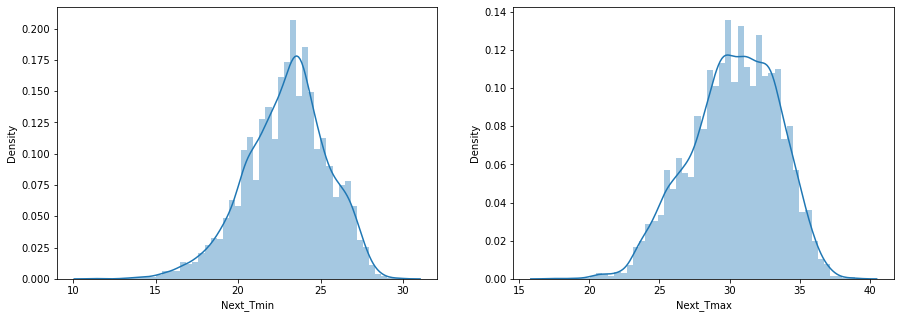

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['Next_Tmin'])
print('Next day_Lowest min temp',data['Next_Tmin'].min())
print('Next day_Highest min temp',data['Next_Tmin'].max())
plt.subplot(1,2,2)
sns.distplot(data['Next_Tmax'])
print('Next day_Lowest maximum temp',data['Next_Tmax'].min())
print('Next day_Highest Maximum temp',data['Next_Tmax'].max())

- The dependent variables showing more or less normal distribution.
- Next day lowest minimum temperature is 11.3, Next day highest minimum temperature is 29.8
- Next day lowest maximum temperature is 17.4, Next day highest maximum temperature is 38.9

Present_day_lowest_min_temp 11.3
Present_day_highest_min_temp 29.9
Present_day_lowest_max_temp 20.0
Present_day_highest_max_temp 37.6


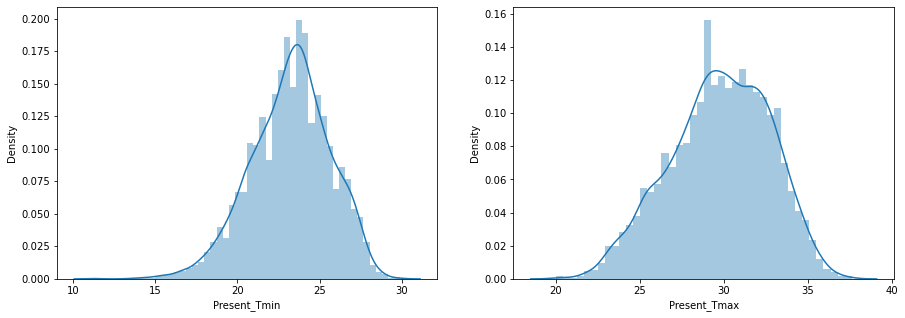

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['Present_Tmin'])
print('Present_day_lowest_min_temp',data['Present_Tmin'].min())
print('Present_day_highest_min_temp',data['Present_Tmin'].max())
plt.subplot(1,2,2)
sns.distplot(data['Present_Tmax'])
print('Present_day_lowest_max_temp',data['Present_Tmax'].min())
print('Present_day_highest_max_temp',data['Present_Tmax'].max())

- The independent variables, Present_Tmin and Present_Tmax are showing more or less normal distribution, a little left skewness is in present day mimimum temperature.
- Present day lowest minimum temperatue is 11.3, Present day highest minimun temperatue is 29.9 .
- Present_day_lowest maximum temperature is  20.0, Present day highest maximum temperature is 37.6 .

next-day lowest minimum relative humidity 19.79466629
next-day highest minimum relative humidity 98.5247345
next-day lowest maximum relative humidity 58.93628311
next-day highest maximum relative humidity 100.00015259999999


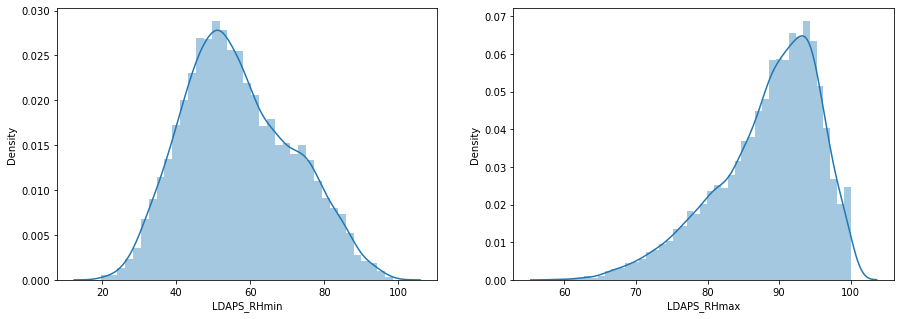

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_RHmin'])
print('next-day lowest minimum relative humidity',data['LDAPS_RHmin'].min())
print('next-day highest minimum relative humidity',data['LDAPS_RHmin'].max())
plt.subplot(1,2,2)
sns.distplot(data['LDAPS_RHmax'])
print('next-day lowest maximum relative humidity',data['LDAPS_RHmax'].min())
print('next-day highest maximum relative humidity',data['LDAPS_RHmax'].max())

- The independent variables, LDAPS_RHmin and LDAPS_RHmax are showing more or less normal distribution, a little left skewness is in LDAPS_RHmax.
- Next day lowest minimum relative humidity is  19.79466629, next-day highest minimum relative humidity is 98.5247345 .
- Next-day lowest maximum relative humidity is 58.93628311, next-day highest maximum relative humidity is 100.000152 .

next-day lowest min air temperature applied lapse rate 14.27264631
next-day highest min air temperature applied lapse rate 29.61934244
next-day lowest max air temperature applied lapse rate  17.62495378
next-day highest max air temperature applied lapse rate  38.54225522


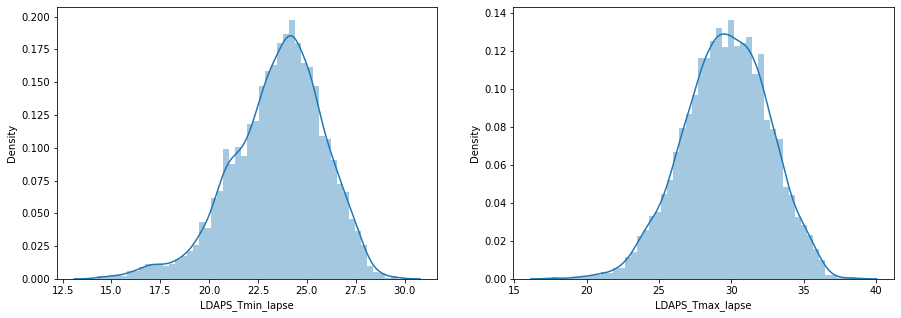

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_Tmin_lapse'])
print('next-day lowest min air temperature applied lapse rate',data['LDAPS_Tmin_lapse'].min())
print('next-day highest min air temperature applied lapse rate',data['LDAPS_Tmin_lapse'].max())
plt.subplot(1,2,2)
sns.distplot(data['LDAPS_Tmax_lapse'])
print('next-day lowest max air temperature applied lapse rate ',data['LDAPS_Tmax_lapse'].min())
print('next-day highest max air temperature applied lapse rate ',data['LDAPS_Tmax_lapse'].max())

- The independent variables, LDAPS_Tmin_lapse and LDAPS_Tmax_lapse are showing more or less normal distribution, a little left skewness is present in both variables.
- Next day lowest minimum air temperature applied lapse rate is 14.27264631, Next day highest minimum air temperature applied lapse rate is 29.61934244 .
- Next-day lowest max air temperature applied lapse rate  is 17.62495378, Next-day highest max air temperature applied lapse rate is 38.54225522 .

next-day min average wind speed: 2.882579625
next-day max average wind speed: 21.85762099
next-day min average latent heat flux: -13.60321209
next-day max average latent heat flux: 213.4140062


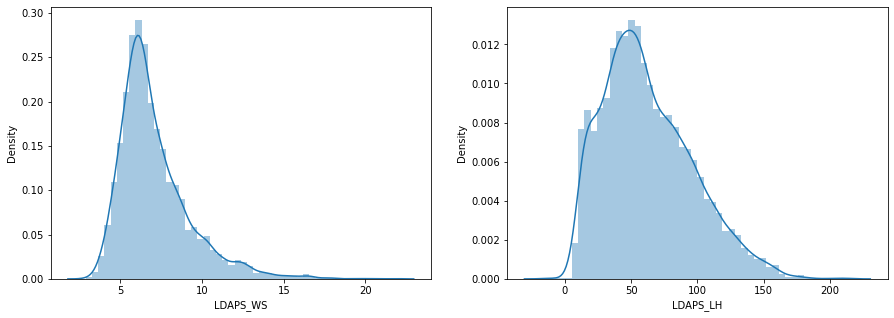

In [41]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_WS'])
print('next-day min average wind speed:',data['LDAPS_WS'].min())
print('next-day max average wind speed:',data['LDAPS_WS'].max())
plt.subplot(1,2,2)
sns.distplot(data['LDAPS_LH'])
print('next-day min average latent heat flux:',data['LDAPS_LH'].min())
print('next-day max average latent heat flux:',data['LDAPS_LH'].max())

- The independent variables, LDAPS_WS and LDAPS_LH are showing more or less normal distribution, a right skewness is present in both variables.
- Next day minimum average wind speed is 2.882579625, Next day maximum average wind speed is 21.85762099 .
- Next day mininimum average latent heat flux is -13.60321209, Next day maximum average latent heat flux is 213.4140062 .

next-day 1st 6-hour split min average cloud cover:  0.0
next-day 1st 6-hour split max average cloud cover:  0.967277328
next-day 2nd 6-hour split min average cloud cover:  0.0
next-day 2nd 6-hour split max average cloud cover:  0.96835306


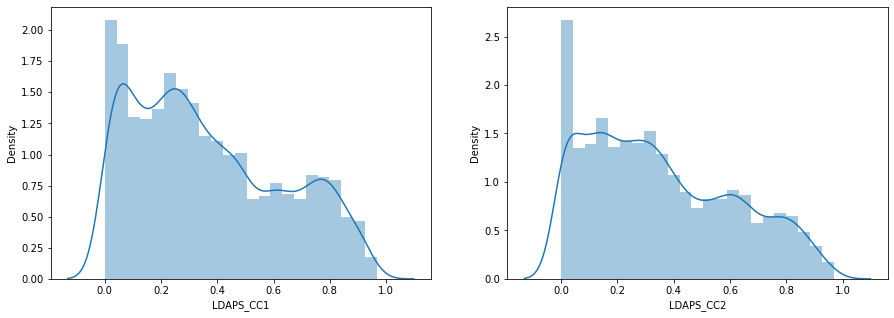

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_CC1'])
print('next-day 1st 6-hour split min average cloud cover: ',data['LDAPS_CC1'].min())
print('next-day 1st 6-hour split max average cloud cover: ',data['LDAPS_CC1'].max())
plt.subplot(1,2,2)
sns.distplot(data['LDAPS_CC2'])
print('next-day 2nd 6-hour split min average cloud cover: ',data['LDAPS_CC2'].min())
print('next-day 2nd 6-hour split max average cloud cover: ',data['LDAPS_CC2'].max())


- The independent variables, LDAPS_CC1 and LDAPS_CC2 are showing more or less normal distribution, a little right skewness is present in both variables.
- Next day 1st 6-hour split minimum average cloud cover is 0.0, Next day 1st 6-hour split maximum  average cloud cover is 0.967277328
- Next day 2nd 6-hour split minimum average cloud cover is 0.0, Next day 2nd 6-hour split maximum average cloud cover is  0.96835306

next-day 3rd 6-hour split min average cloud cover:  0.0
next-day 3rd 6-hour split max average cloud cover:  0.983788755
next-day 4th 6-hour split min average cloud cover:  0.0
next-day 4th 6-hour split max average cloud cover:  0.9747095240000001


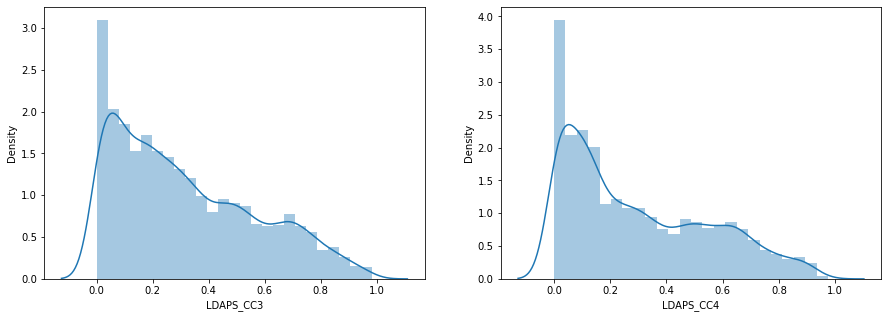

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_CC3'])
print('next-day 3rd 6-hour split min average cloud cover: ',data['LDAPS_CC3'].min())
print('next-day 3rd 6-hour split max average cloud cover: ',data['LDAPS_CC3'].max())
plt.subplot(1,2,2)
sns.distplot(data['LDAPS_CC4'])
print('next-day 4th 6-hour split min average cloud cover: ',data['LDAPS_CC4'].min())
print('next-day 4th 6-hour split max average cloud cover: ',data['LDAPS_CC4'].max())

- The independent variables, LDAPS_CC3 and LDAPS_CC4 are showing more or less normal distribution, a little right skewness is present in both variables.
- Next day 3rd 6-hour split minimum average cloud cover is 0.0, Next day 3rd 6-hour split maximum  average cloud cover is 0.983788755 .
- Next day 4th 6-hour split minimum average cloud cover is 0.0, Next day 4th 6-hour split maximum average cloud cover is  0.974709524 .

next-day 1st 6-hour split min average precipitation:  0.0
next-day 1st 6-hour split max average precipitation:  23.70154408
next-day 2nd 6-hour split min average precipitation:  0.0
next-day 2nd 6-hour split max average precipitation:  21.62166078


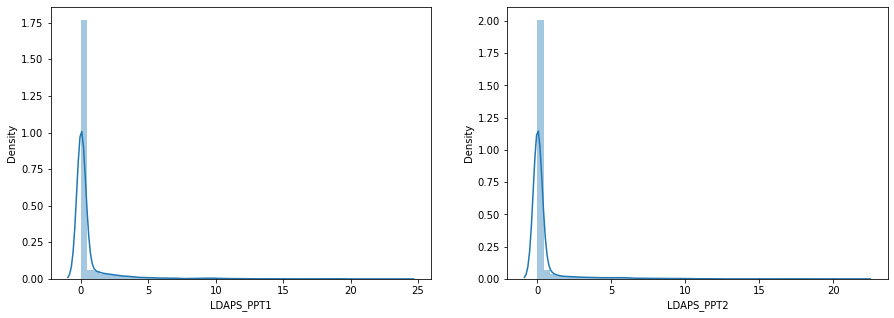

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_PPT1'])
print('next-day 1st 6-hour split min average precipitation: ',data['LDAPS_PPT1'].min())
print('next-day 1st 6-hour split max average precipitation: ',data['LDAPS_PPT1'].max())
plt.subplot(1,2,2)
sns.distplot(data['LDAPS_PPT2'])
print('next-day 2nd 6-hour split min average precipitation: ',data['LDAPS_PPT2'].min())
print('next-day 2nd 6-hour split max average precipitation: ',data['LDAPS_PPT2'].max())

- The independent variables, LDAPS_PPT1 and LDAPS_PPT2 both the variables are showing right skewness.
- Next day 1st 6-hour split minimum average precipitation is 0.0, Next day 1st 6-hour split maximum average precipitation is 23.70154408 .
- Next day 2nd 6-hour split minimum average precipitation is 0.0, Next day 2nd 6-hour split maximum average precipitation is  21.62166078 .

next-day 3nd 6-hour split min average precipitation:  0.0
next-day 3nd 6-hour split max average precipitation:  15.84123484
next-day 4nd 6-hour split min average precipitation:  0.0
next-day 4nd 6-hour split max average precipitation:  16.65546921


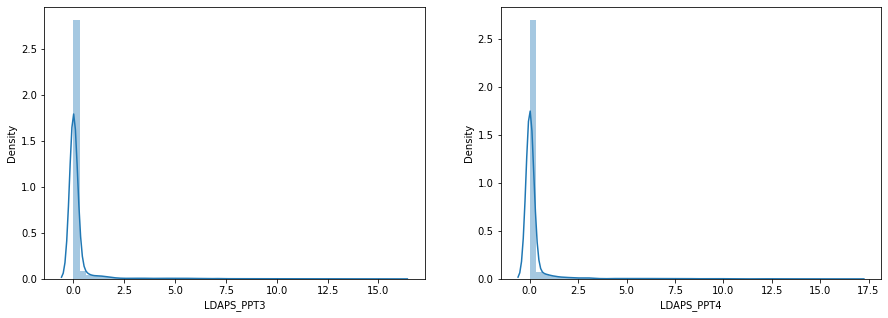

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['LDAPS_PPT3'])
print('next-day 3nd 6-hour split min average precipitation: ',data['LDAPS_PPT3'].min())
print('next-day 3nd 6-hour split max average precipitation: ',data['LDAPS_PPT3'].max())
plt.subplot(1,2,2)
sns.distplot(data['LDAPS_PPT4'])
print('next-day 4nd 6-hour split min average precipitation: ',data['LDAPS_PPT4'].min())
print('next-day 4nd 6-hour split max average precipitation: ',data['LDAPS_PPT4'].max())

- The independent variables, LDAPS_PPT3 and LDAPS_PPT4 both the variables are showing right skewness.
- Next day 3rd 6-hour split minimum average precipitation is 0.0, Next day 1st 6-hour split maximum average precipitation is 15.84123484 .
- Next day 4th 6-hour split minimum average precipitation is 0.0, Next day 4th 6-hour split maximum average precipitation is  16.65546921 .

Minimum Latitude: 37.4562
Maximum Latitude: 37.645
Minimum Longitude:  126.82600000000001
Maximum Longitude:  127.135


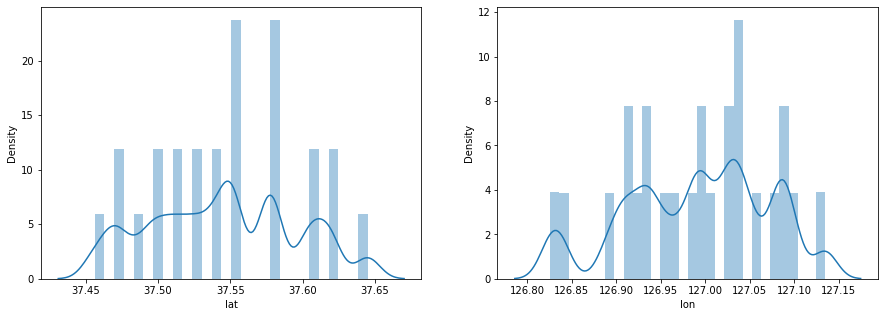

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['lat'])
print('Minimum Latitude:',data['lat'].min())
print('Maximum Latitude:',data['lat'].max())
plt.subplot(1,2,2)
sns.distplot(data['lon'])
print('Minimum Longitude: ',data['lon'].min())
print('Maximum Longitude: ',data['lon'].max())

- The independent variables,Latitude and Longitude both the variables are showing more or less normal distribution.
- Minimum Latitude is 37.4562 and Maximum Latitude is 37.645 .
- Minimum Longitude is 126.82 and Maximum Longitude is 127.135 .

Minimum Elevation:  12.37
Maximum Elevation:  212.335


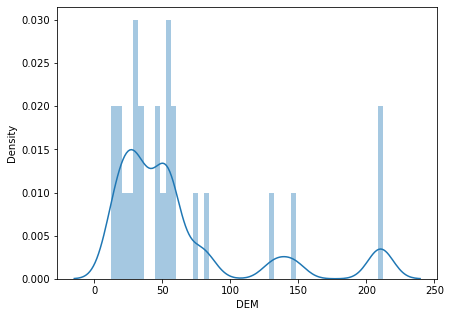

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['DEM'])
print('Minimum Elevation: ',data['DEM'].min())
print('Maximum Elevation: ',data['DEM'].max())

- The independent variable,DEM is showing more or less skewness.
- Minimum Elevation is 12.37 and Maximum Elevation is 212.335 .

Minimum Slope:  0.09847460000000001
Maximum Slope:  5.17823


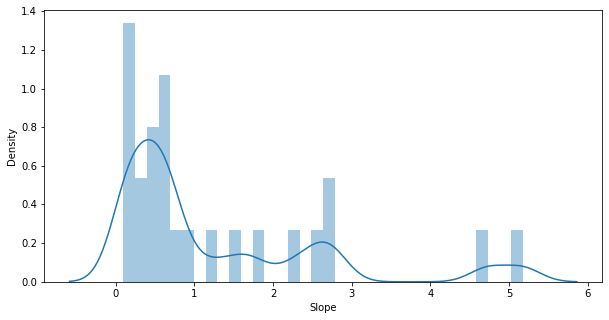

In [50]:
plt.figure(figsize=(10,5))
sns.distplot(data['Slope'])
print('Minimum Slope: ',data['Slope'].min())
print('Maximum Slope: ',data['Slope'].max())

- The independent variable,Slope is showing more or less skewness.
- Minimum Slope is 0.0984746 and Maximum Slope is 5.17823 .

Minimum 4329.520508
Maximum 5992.895996


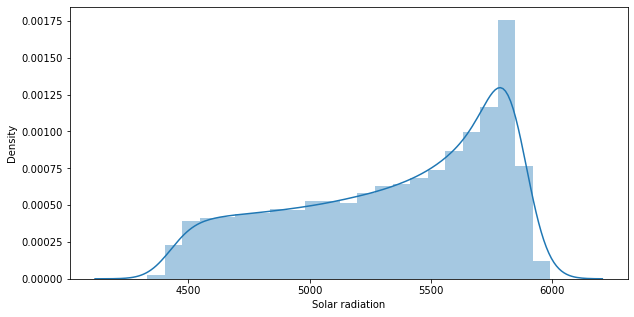

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(data['Solar radiation'])
print('Minimum',data['Solar radiation'].min())
print('Maximum',data['Solar radiation'].max())

- The independent variable, Solar radiation is showing more or less normal distribution.
- Minimum Solar radiation minimum is 4329.520508 and Solar radiation maximum 5992.895996 .

#### Outlier Detection:

In [69]:
data.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

- As we can see, there are skewness in LDAPS_WS, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope that we need to take care.

Let's check the outliers in the continuous data.

In [90]:
# taking continuous features into a singgle variable
data_features=data[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse',
                    'LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2',
                    'LDAPS_PPT3','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation',]]

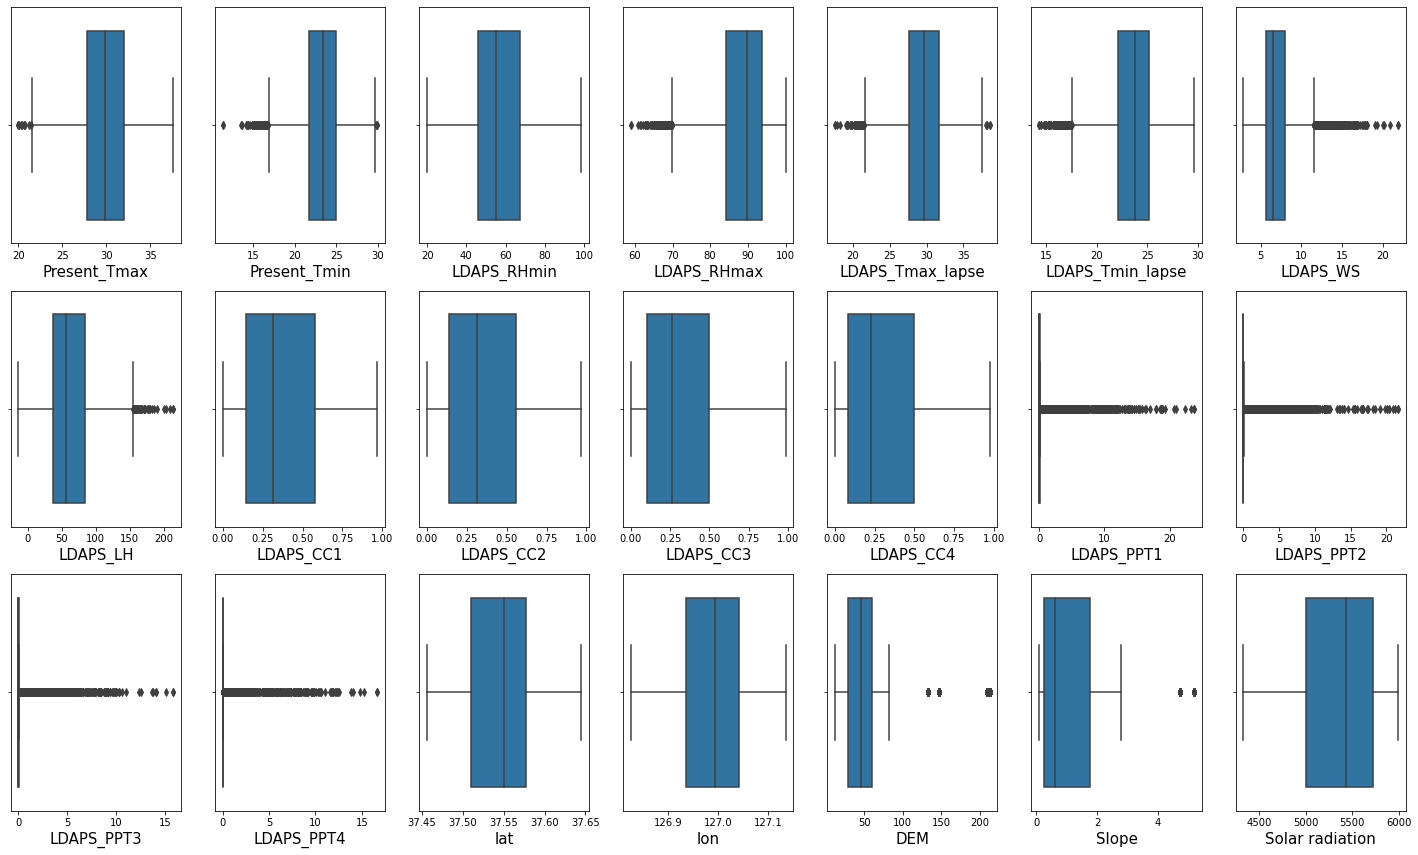

In [68]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1
for column in data_features:
    if plotnumber<=28:
        ax=plt.subplot(4,7,plotnumber)
        sns.boxplot(data_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()  

- There are outliers in most of the variables like, Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 and DEM and Slope is having 2-3 outliers.

#### Bivariate Analysis:



- For checking the relations we are separating the features and the labels. For checking the relations  between features and Next day's maximum temperature we are dividing the dataset into x and y variables.
- And for checking the relations between features and Next day's minimum temperature we are dividing the dataset into X and Y variables.

In [91]:
#for Next_Tmax
y = data['Next_Tmax']
x = data.drop(columns=['Next_Tmax'])
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7747    28.3
7748    28.6
7749    27.8
7750    17.4
7751    38.9
Name: Next_Tmax, Length: 7752, dtype: float64

In [94]:
#for Next_Tmin
Y = data['Next_Tmin']
X = data.drop(columns=['Next_Tmin'])
Y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7747    18.1
7748    18.8
7749    17.4
7750    11.3
7751    29.8
Name: Next_Tmin, Length: 7752, dtype: float64

- As the labels are ready to visualize relaions let's do that.

#### Relations between continuous features and label ( next day's maximum temparature ) :

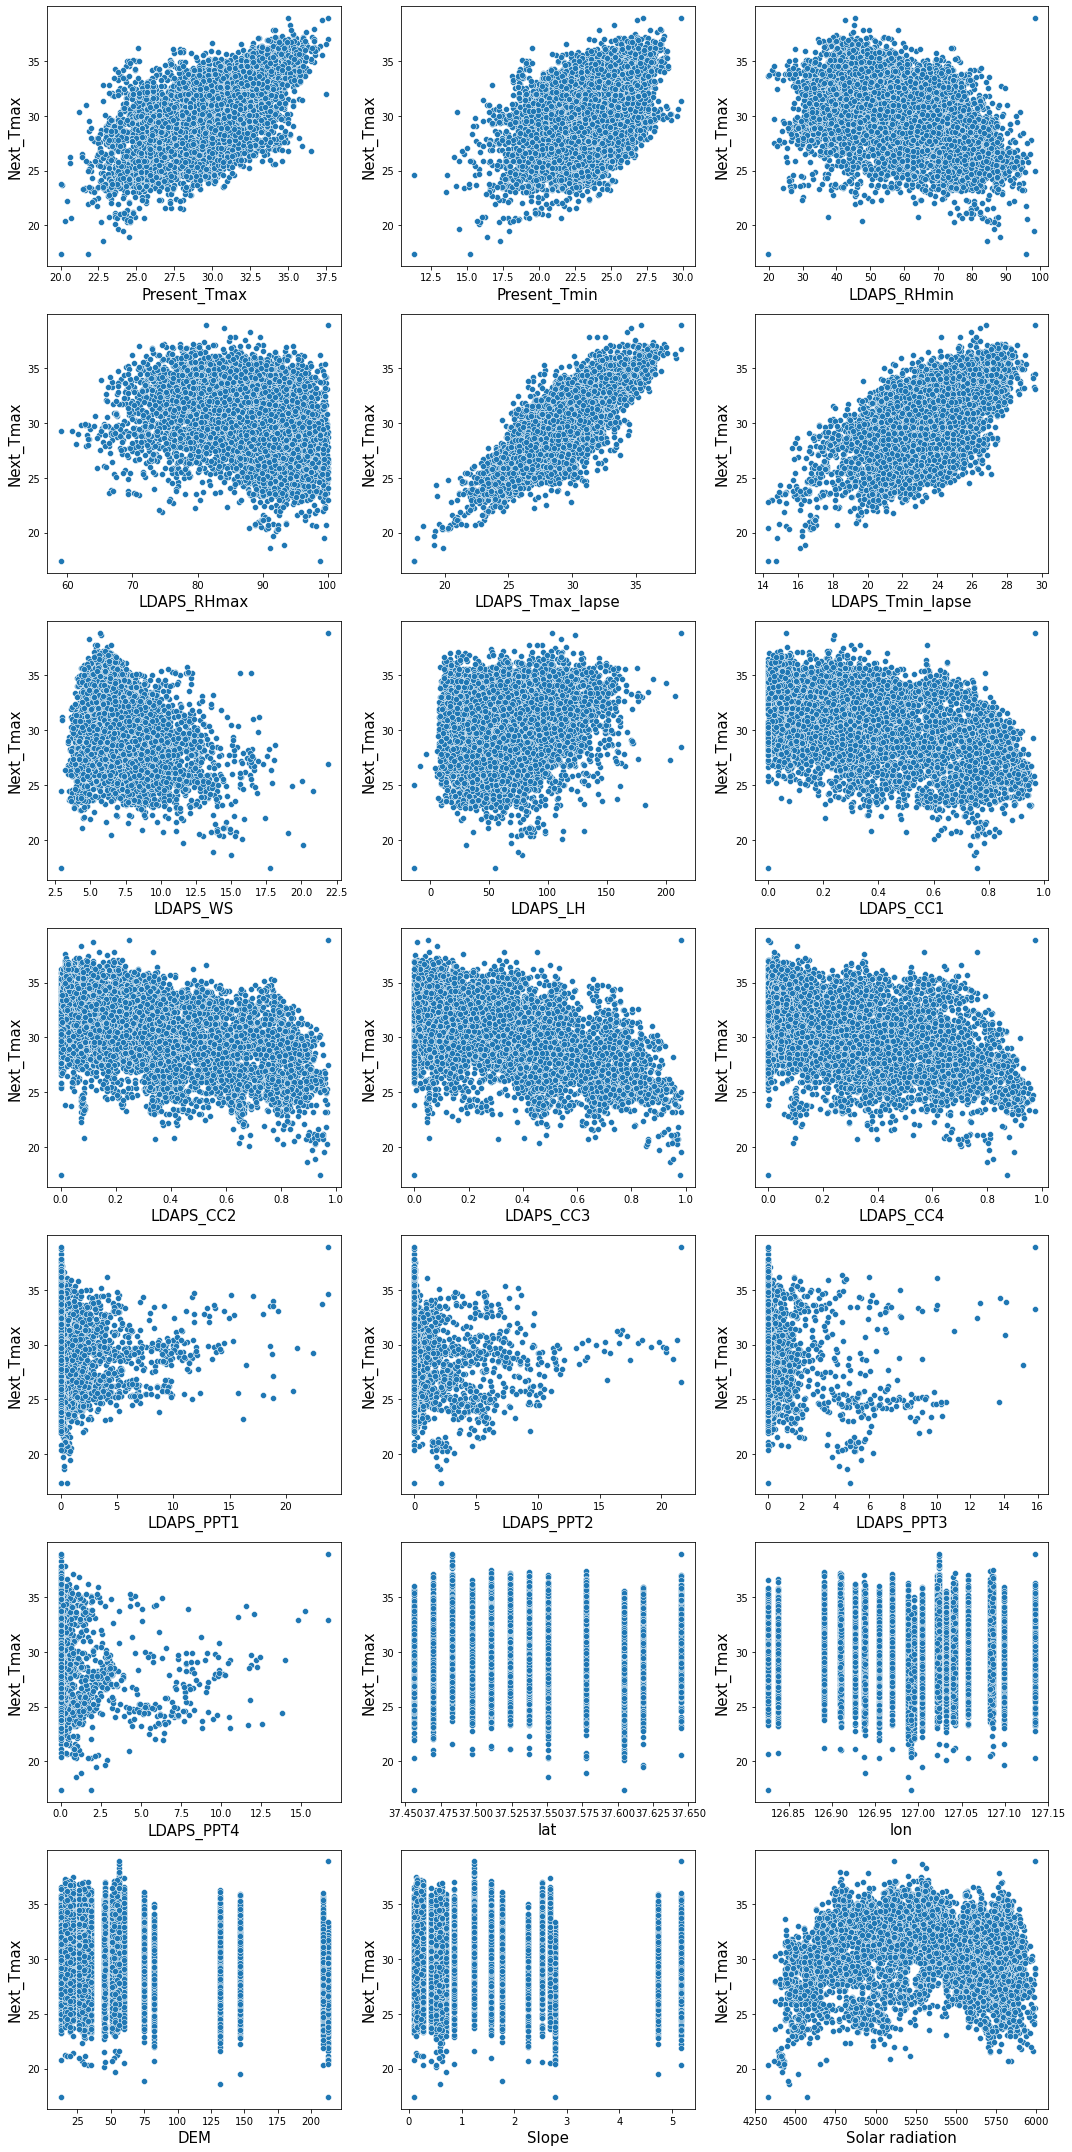

In [93]:
plt.figure(figsize=(15,30),facecolor='white')
plotnumber=1
for column in data_features:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.scatterplot(data_features[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Next_Tmax',fontsize=15)
    plotnumber+=1
plt.tight_layout()  

- Next day's maximum temperature and present day's maximum temperature has a positive linear relation.
- Next day's maximum temperature and present day's minimum temperature has a positive linear relation.
- Next day's maximum temperature and next-day minimum relative humidity has a negative linear relation.
- Next day's maximum temperature and next-day maximum relative humidity has a negative linear relation.
- Next day's maximum temperature and next-day maximum air temperature applied lapse rate has a positive linear relation.
- Next day's maximum temperature and next-day minimum air temperature applied lapse rate has a positive linear relation.
- Next day's maximum temperature and next-day average wind speed has a negative linear relation.
- Next day's maximum temperature and next-day average latent heat flux has a more or less positive linear relation.
- Next day's maximum temperature and next-day 1st 6-hour split average cloud cover has a more or less negative linear relation.
- Next day's maximum temperature and next-day 2nd 6-hour split average cloud cover has a more or less negative linear relation.
- Next day's maximum temperature and next-day 3rd 6-hour split average cloud cover has a more or less negative linear relation.
- Next day's maximum temperature and next-day 4th 6-hour split average cloud cover has a more or less negative linear relation.
- The relation between Next day's maximum temperature and next-day 1st 6-hour split average precipitation is spscattered.
- The relation between Next day's maximum temperature and next-day 2st 6-hour split average precipitation is somewhat scattered.
- The relation between Next day's maximum temperature and next-day 3st 6-hour split average precipitation is somewhat scattered.
- The relation between Next day's maximum temperature and next-day 4st 6-hour split average precipitation is somewhat scattered.
- Between Lattitude 35.475 - 35.500 next day's maximum temperature is showing little high.
- Between Longitude 127.00 - 127.05 next day's maximum temperature is showing little high.
- Between Elevation 25 - 50 next day's maximum temperature is showing little high.
- Between Slope 0 - 1 next day's maximum temperature is showing little high.
- More solar radiation more temperature.


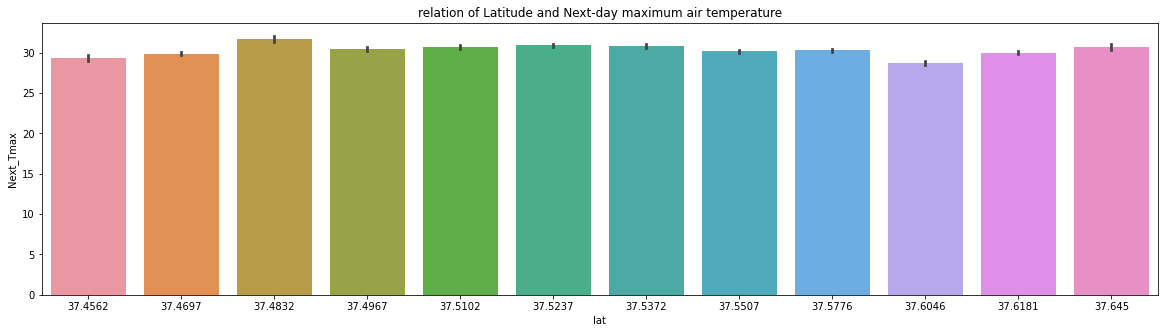

In [114]:
plt.figure(figsize=(20,5))
sns.barplot(x='lat',y='Next_Tmax',data=data).set_title('relation of Latitude and Next-day maximum air temperature')
plt.show()

- In Latitude 37.4697 the next day's maximum temperature is highest.

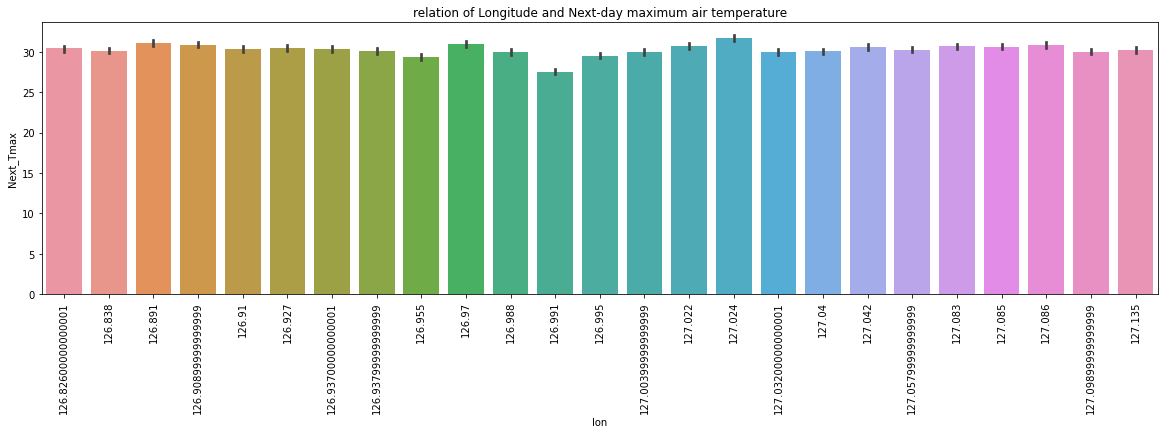

In [113]:
plt.figure(figsize=(20,5))
sns.barplot(x='lon',y='Next_Tmax',data=data).set_title('relation of Longitude and Next-day maximum air temperature')
plt.xticks(rotation=90)
plt.show()

- In Longitude 127.024 the next day's maximum temperature is highest.

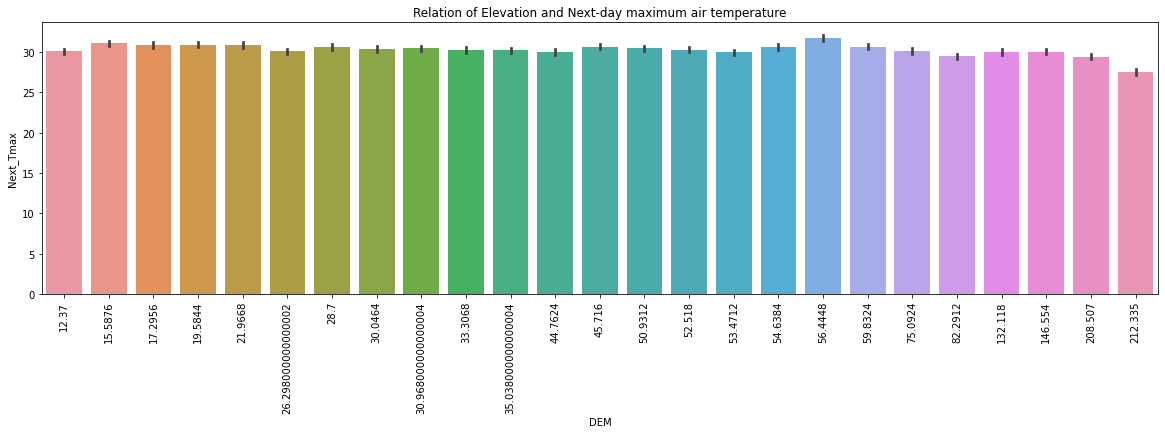

In [112]:
plt.figure(figsize=(20,5))
sns.barplot(x='DEM',y='Next_Tmax',data=data).set_title('Relation of Elevation and Next-day maximum air temperature')
plt.xticks(rotation=90)
plt.show()

- In case of Elevation ( height above sea level ) 56.448 the next day's maximum temperature is highest.

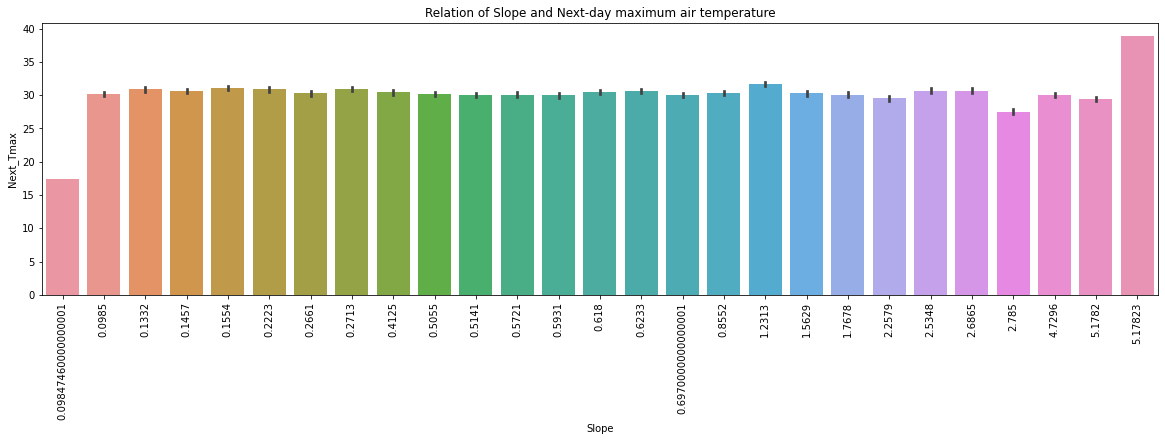

In [111]:
plt.figure(figsize=(20,5))
sns.barplot(x='Slope',y='Next_Tmax',data=data).set_title('Relation of Slope and Next-day maximum air temperature')
plt.xticks(rotation=90)
plt.show()

- In case of Slope 5.17823 the next day's maximum temperature is highest.

#### Relations between continuous features and label ( next day's minimum temparature ) :

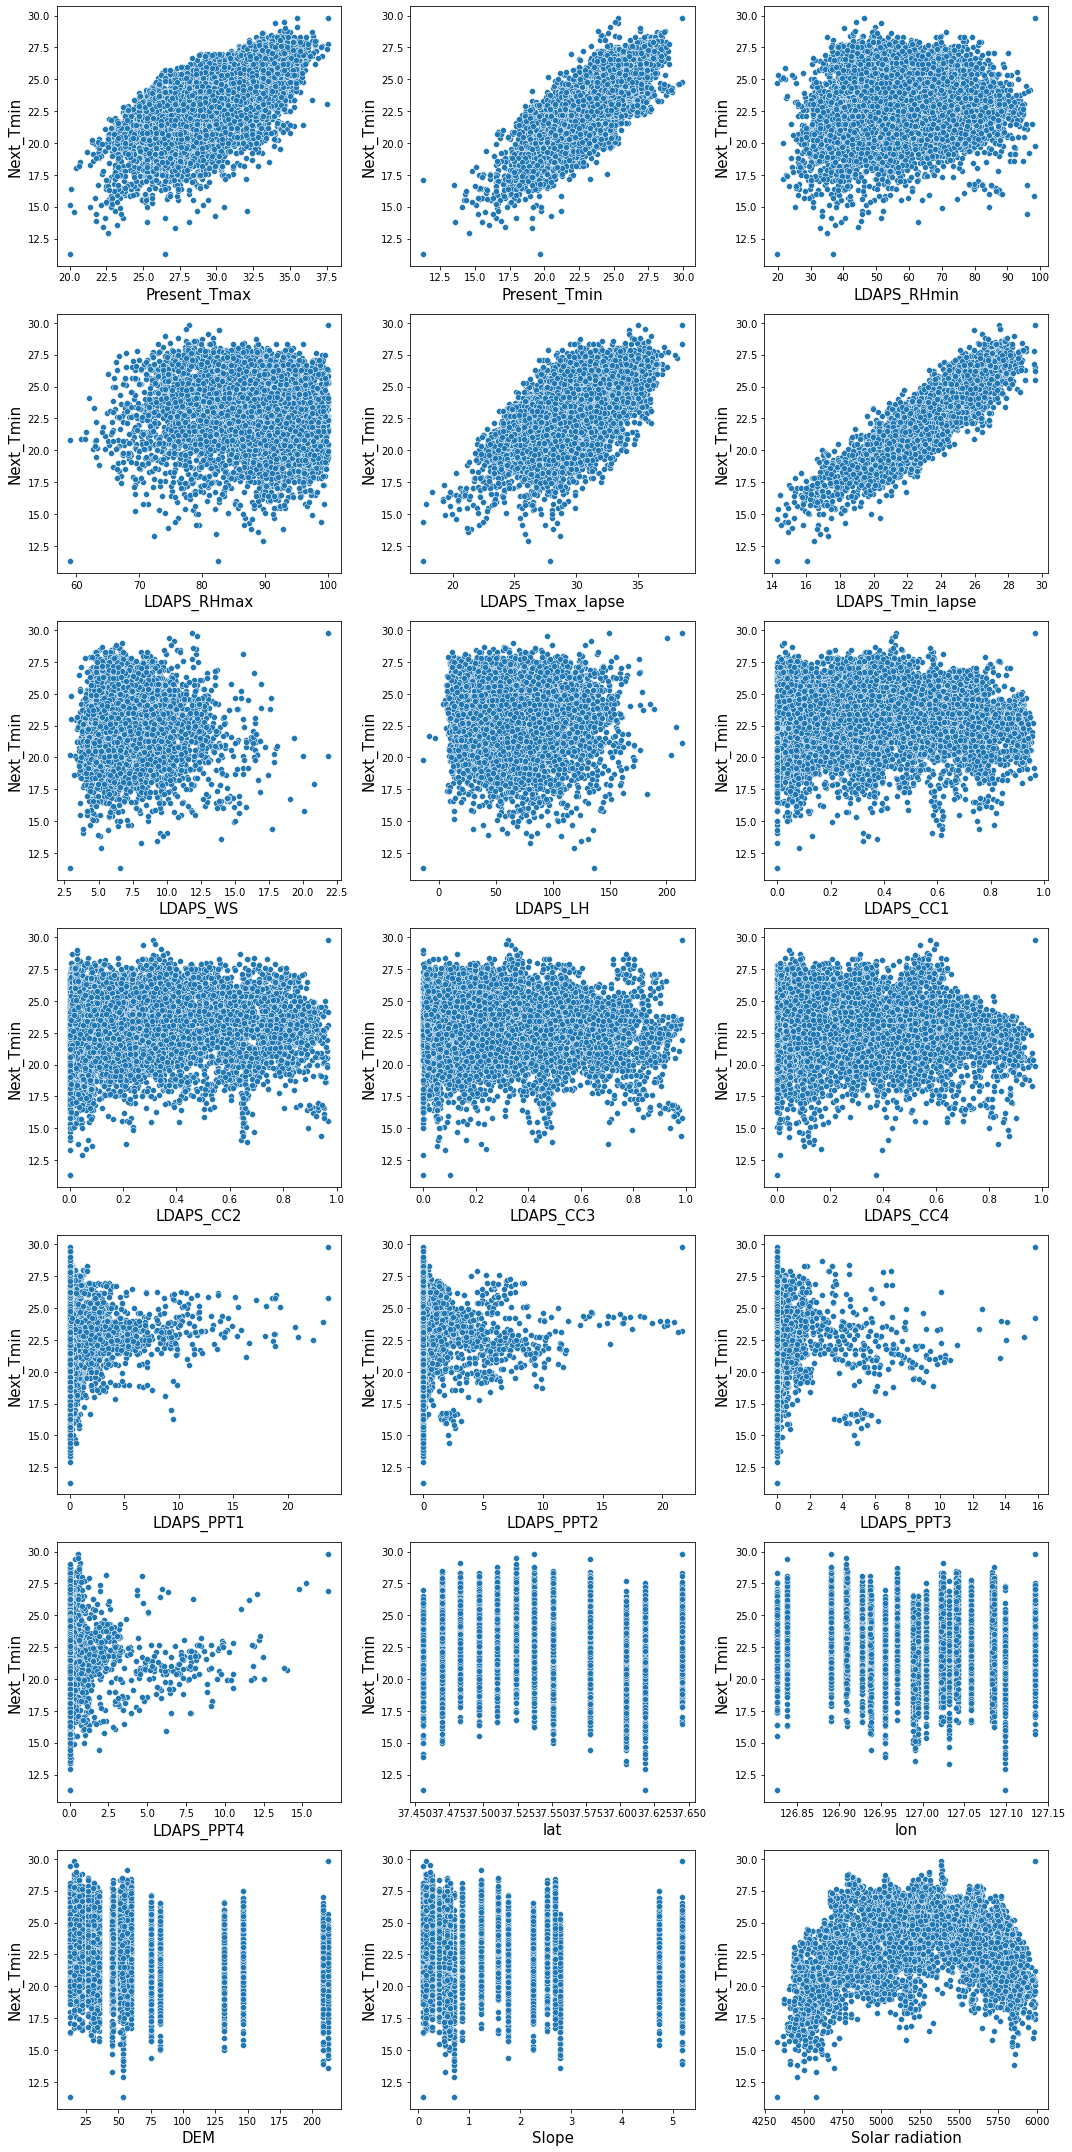

In [97]:
plt.figure(figsize=(15,30),facecolor='white')
plotnumber=1
for column in data_features:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.scatterplot(data_features[column],Y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Next_Tmin',fontsize=15)
    plotnumber+=1
plt.tight_layout()  

- Next day's minimum temperature and present day's maximum temperature has a positive linear relation.
- Next day's minimum temperature and present day's minimum temperature has a positive linear relation.
- Next day's minimum temperature and next-day minimum relative humidity has a positive relation.
- Next day's minimum temperature and next-day maximum relative humidity has a positive relation.
- Next day's minimum temperature and next-day maximum air temperature applied lapse rate has a positive linear relation.
- Next day's minimum temperature and next-day minimum air temperature applied lapse rate has a positive linear relation.
- Next day's minimum temperature and next-day average wind speed has a scattered relation.
- Next day's minimum temperature and next-day average latent heat flux has a more or less scattered relation.
- Next day's minimum temperature and next-day 1st 6-hour split average cloud cover has a more or less scattered relation.
- Next day's minimum temperature and next-day 2nd 6-hour split average cloud cover has a more or less scattered relation.
- Next day's minimum temperature and next-day 3rd 6-hour split average cloud cover has a more or less scattered relation.
- Next day's minimum temperature and next-day 4th 6-hour split average cloud cover has a more or less scattered relation.
- The relation between Next day's minimum temperature and next-day 1st 6-hour split average precipitation is scattered.
- The relation between Next day's minimum temperature and next-day 2st 6-hour split average precipitation is somewhat scattered.
- The relation between Next day's minimum temperature and next-day 3st 6-hour split average precipitation is somewhat scattered.
- The relation between Next day's minimum temperature and next-day 4st 6-hour split average precipitation is somewhat scattered.
- Between Lattitude 37.600 - 37.625 next day's minimum temperature is showing more low.
- Between Longitude 127.10  next day's minimum temperature is showing more low.
- Between Elevation 50 next day's minimum temperature is showing more low.
- Between Slope 0 - 1 next day's minimum temperature is showing more low.
- Less solar radiation less temperature.

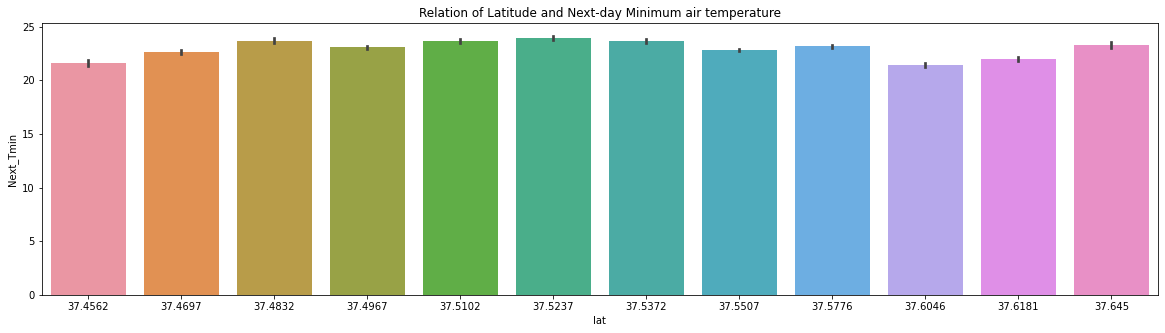

In [107]:
plt.figure(figsize=(20,5))
sns.barplot(x='lat',y='Next_Tmin',data=data).set_title('Relation of Latitude and Next-day Minimum air temperature')
plt.show()

- Latitude 37.60 has the lowest minimum temperature on next day.

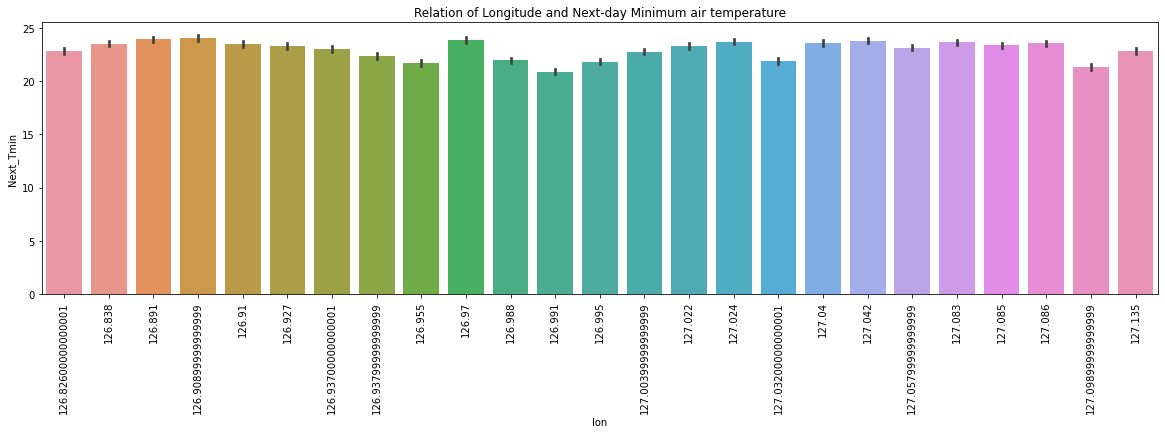

In [108]:
plt.figure(figsize=(20,5))
sns.barplot(x='lon',y='Next_Tmin',data=data).set_title('Relation of Longitude and Next-day Minimum air temperature')
plt.xticks(rotation=90)
plt.show()

- Longitude 126.991 has the lowest minimum temperature on next day.

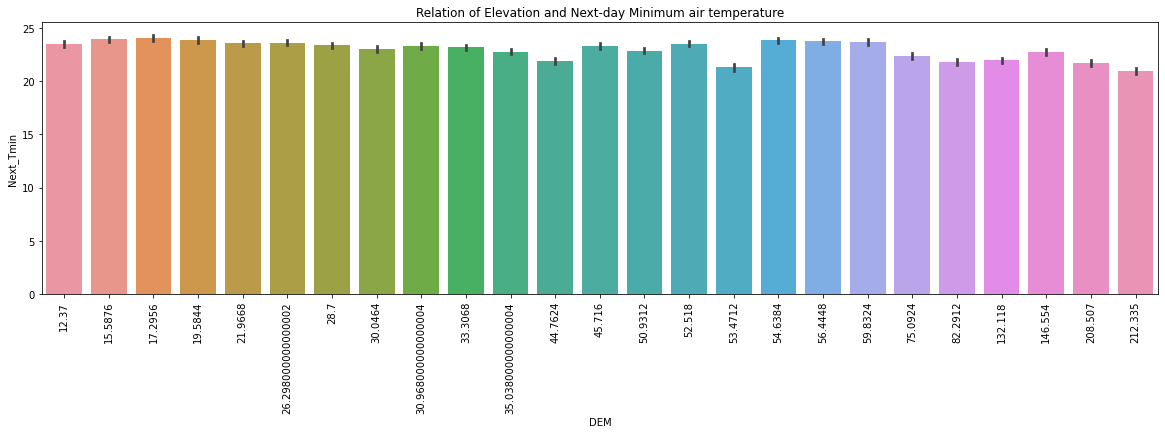

In [109]:
plt.figure(figsize=(20,5))
sns.barplot(x='DEM',y='Next_Tmin',data=data).set_title('Relation of Elevation and Next-day Minimum air temperature')
plt.xticks(rotation=90)
plt.show()

- Elevation 212.335 has the lowest minimum temperature on next day.

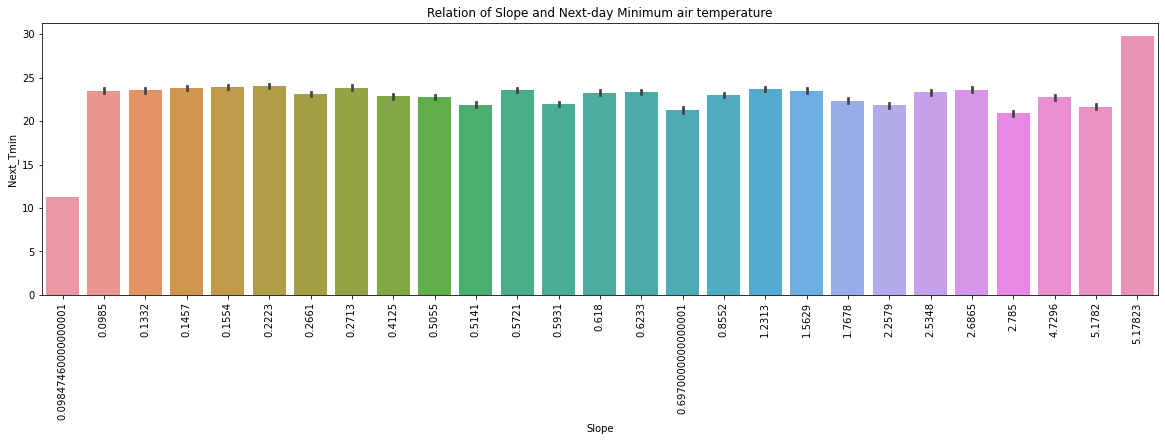

In [110]:
plt.figure(figsize=(20,5))
sns.barplot(x='Slope',y='Next_Tmin',data=data).set_title('Relation of Slope and Next-day Minimum air temperature')
plt.xticks(rotation=90)
plt.show()

- Slope 0.09847 has the lowest minimum temperature on next day.



Now let's drop the station column a it is containing only serial numbers.

In [3]:
# Drop alert:
drop_columns = ['station']
data = data.drop(columns = drop_columns,axis=1)

- Let's Check the correlations of feature vs feature and feature vs labels:

In [9]:
corr = data.corr()
corr

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Present_Tmax          1.000000      0.618760    -0.206782    -0.304209   
Present_Tmin          0.618760      1.000000     0.124921    -0.015334   
LDAPS_RHmin          -0.206782      0.124921     1.000000     0.579141   
LDAPS_RHmax          -0.304209     -0.015334     0.579141     1.000000   
LDAPS_Tmax_lapse      0.575289      0.470118    -0.564580    -0.373404   
LDAPS_Tmin_lapse      0.629247      0.772921     0.089476    -0.114143   
LDAPS_WS             -0.122876     -0.035111     0.294361     0.135333   
LDAPS_LH              0.136716     -0.009368    -0.070858     0.238579   
LDAPS_CC1            -0.314863      0.085593     0.613818     0.436652   
LDAPS_CC2            -0.215816      0.091439     0.745443     0.391330   
LDAPS_CC3            -0.145513     -0.002839     0.689679     0.226957   
LDAPS_CC4            -0.142497     -0.045091     0.514075     0.130619   
LDAPS_PPT1           -0.110001      0.114312     0.262665     0.268449   
LDAPS_PPT2           -0.100420      0.069095     0.390967     0.229050   
LDAPS_PPT3           -0.121271     -0.046645     0.240642     0.134607   
LDAPS_PPT4           -0.101471     -0.064394     0.168595     0.117853   
lat                  -0.052776     -0.078715     0.087523     0.196751   
lon                   0.009075     -0.043725    -0.076608     0.025792   
DEM                  -0.187855     -0.251257     0.102612     0.178031   
Slope                -0.106097     -0.146736     0.124346     0.220668   
Solar radiation      -0.025557      0.053828     0.244795     0.149699   
Next_Tmax             0.613109      0.473868    -0.442958    -0.286478   
Next_Tmin             0.625252      0.799758     0.095830    -0.072490   

                  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
Present_Tmax              0.575289          0.629247 -0.122876  0.136716   
Present_Tmin              0.470118          0.772921 -0.035111 -0.009368   
LDAPS_RHmin              -0.564580          0.089476  0.294361 -0.070858   
LDAPS_RHmax              -0.373404         -0.114143  0.135333  0.238579   
LDAPS_Tmax_lapse          1.000000          0.654021 -0.311996  0.048010   
LDAPS_Tmin_lapse          0.654021          1.000000 -0.130035 -0.134761   
LDAPS_WS                 -0.311996         -0.130035  1.000000  0.006711   
LDAPS_LH                  0.048010         -0.134761  0.006711  1.000000   
LDAPS_CC1                -0.438439          0.010901  0.289445 -0.147296   
LDAPS_CC2                -0.523619          0.047727  0.261090 -0.264280   
LDAPS_CC3                -0.541327         -0.044018  0.242991 -0.245583   
LDAPS_CC4                -0.429539         -0.080335  0.220533 -0.172766   
LDAPS_PPT1               -0.111065          0.038056  0.152587 -0.012542   
LDAPS_PPT2               -0.242122          0.000870  0.191886 -0.077545   
LDAPS_PPT3               -0.188115         -0.088575  0.161684  0.016102   
LDAPS_PPT4               -0.160273         -0.094655  0.144085  0.019979   
lat                      -0.042298         -0.096726  0.036836  0.133870   
lon                       0.091107         -0.026831 -0.059756  0.025948   
DEM                      -0.179766         -0.196407  0.191983  0.055402   
Slope                    -0.163123         -0.186753  0.172464  0.087203   
Solar radiation           0.048111          0.160443  0.122116 -0.047523   
Next_Tmax                 0.836144          0.593195 -0.346592  0.159324   
Next_Tmin                 0.591535          0.886964 -0.097390 -0.055895   

                  LDAPS_CC1  LDAPS_CC2  ...  LDAPS_PPT2  LDAPS_PPT3  \
Present_Tmax      -0.314863  -0.215816  ...   -0.100420   -0.121271   
Present_Tmin       0.085593   0.091439  ...    0.069095   -0.046645   
LDAPS_RHmin        0.613818   0.745443  ...    0.390967    0.240642   
LDAPS_RHmax        0.436652   0.391330  ...    0.229050    0.134607   
LDAPS_Tmax_lapse  -0.438439  -0.523619  ...   -0.242122   -0.

#### Heatmap (Correlation Matrix):

Let's find the coefficient of multicolinearty to check if any feature is correlated to another featue or not.

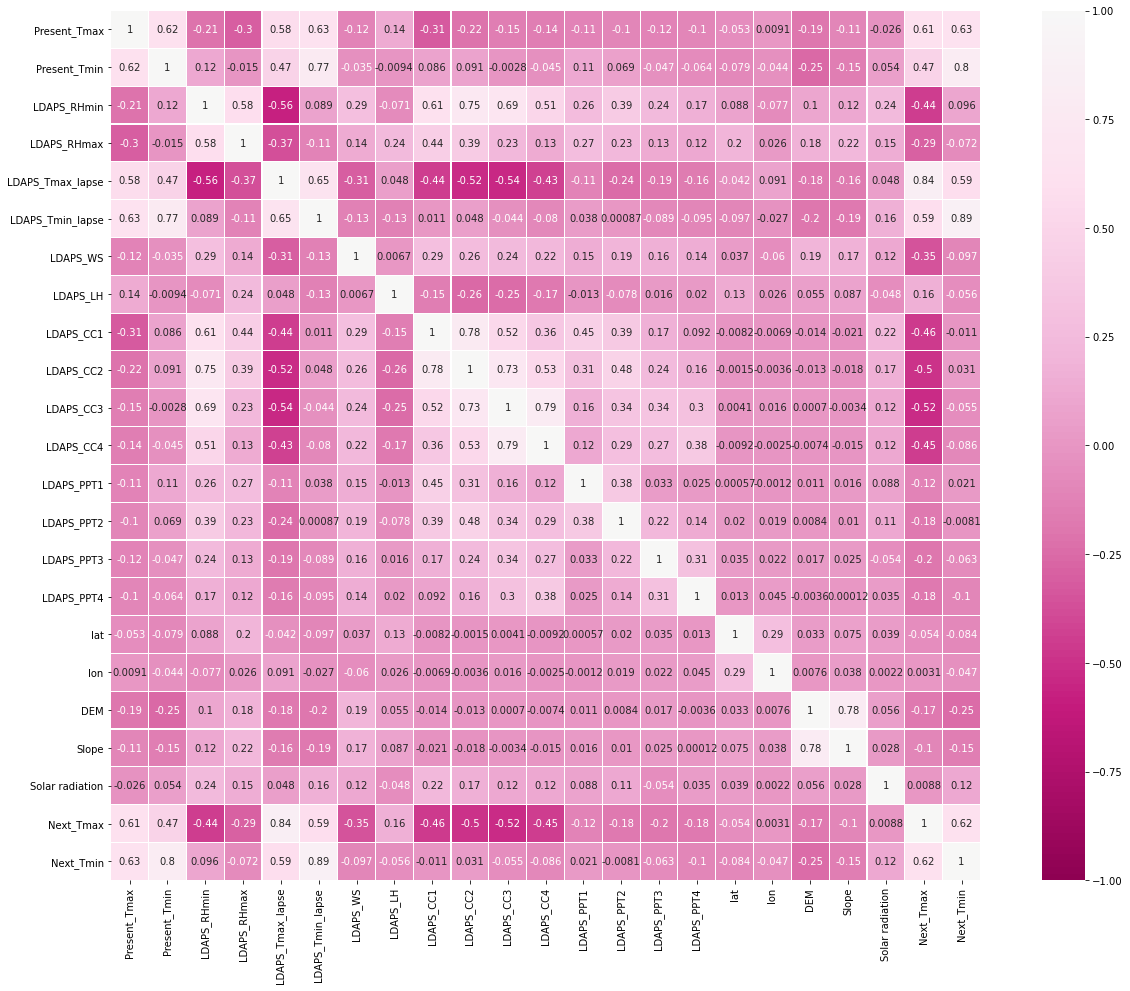

In [10]:
plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='PiYG',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- Next_Tmax has a good correlation with LDAPS_Tmax_lapse(0.84).
- Next_Tmin has a good correlation with present_Tmin(0.8).
- The features are not much correlated with each other.

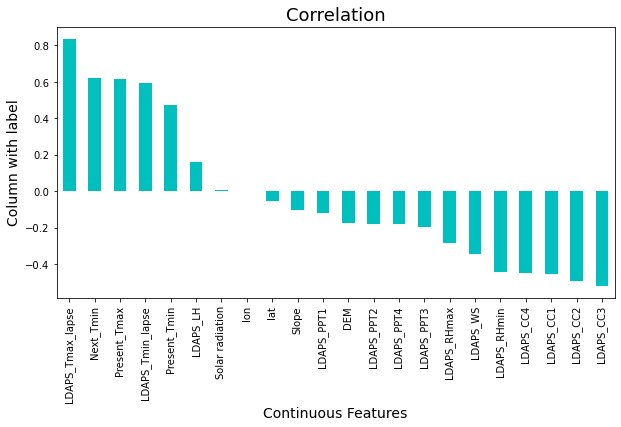

In [128]:
plt.figure(figsize=(10,5))
data.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('Continuous Features',fontsize=14)
plt.ylabel('Column with label',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- Next_Tmax has highest positive correlation with LDAPS_Tmax_lapse.
- Next_Tmax has highest negative correlation with LDPAS_CC3.

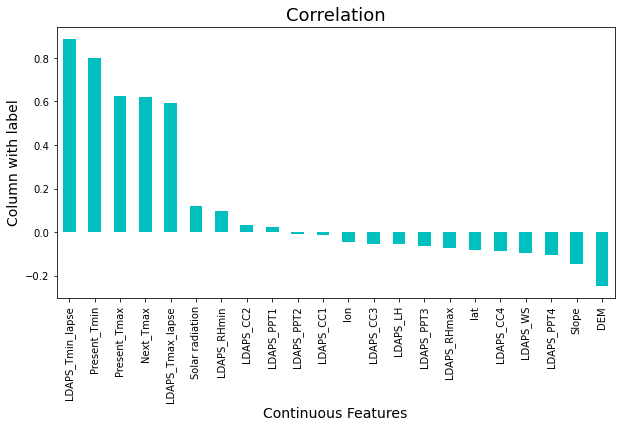

In [129]:
plt.figure(figsize=(10,5))
data.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('Continuous Features',fontsize=14)
plt.ylabel('Column with label',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- Next_Tmin has highest positive correlation with LDAPS_Tmin_lapse.
- Next_Tmin has highest negative correlation with DEM.

#### Data cleaning:

- 1. Filling the missing values 

In [4]:
data.isna().sum()

Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

- There are presence of missing values in almost every variable. Let's remove those using KNN Imputer.

In [5]:
k=KNNImputer(n_neighbors=2)
data['Next_Tmax']=k.fit_transform(data[['Next_Tmax']])
data['Next_Tmin']=k.fit_transform(data[['Next_Tmin']])
data['Present_Tmax']=k.fit_transform(data[['Present_Tmax']])
data['Present_Tmin']=k.fit_transform(data[['Present_Tmin']])
data['LDAPS_RHmin']=k.fit_transform(data[['LDAPS_RHmin']])
data['LDAPS_RHmax']=k.fit_transform(data[['LDAPS_RHmax']])
data['LDAPS_Tmax_lapse']=k.fit_transform(data[['LDAPS_Tmax_lapse']])
data['LDAPS_Tmin_lapse']=k.fit_transform(data[['LDAPS_Tmin_lapse']])
data['LDAPS_WS']=k.fit_transform(data[['LDAPS_WS']])
data['LDAPS_LH']=k.fit_transform(data[['LDAPS_LH']])
data['LDAPS_CC1']=k.fit_transform(data[['LDAPS_CC1']])
data['LDAPS_CC2']=k.fit_transform(data[['LDAPS_CC2']])
data['LDAPS_CC3']=k.fit_transform(data[['LDAPS_CC3']])
data['LDAPS_CC4']=k.fit_transform(data[['LDAPS_CC4']])
data['LDAPS_PPT1']=k.fit_transform(data[['LDAPS_PPT1']])
data['LDAPS_PPT2']=k.fit_transform(data[['LDAPS_PPT2']])
data['LDAPS_PPT3']=k.fit_transform(data[['LDAPS_PPT3']])
data['LDAPS_PPT4']=k.fit_transform(data[['LDAPS_PPT4']])

- We have impute those missing values by using KNN Imputer.

In [6]:
data.isna().sum()

Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

- As we can see, there is only 2 date data left with missing values. That we will drop.

In [7]:
# Drop Alert:
data.dropna(inplace=True) 

In [8]:
data.isna().sum()

Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

- As we can see, there is no missing value present in the dataset.

- 2. Outlier Removal:

We are using z-score to remove the outliers from the dataset.

In [9]:
z_score = zscore(data[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse',
                       'LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']])     
abs_z_score=np.abs(z_score)#converting data into standard normal distribution

filtering_entry=(abs_z_score<3.5).all(axis=1)

data=data[filtering_entry]
data.describe()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
count   7134.000000   7134.000000  7134.000000  7134.000000       7134.000000   
mean      29.882048     23.260125    55.719464    88.036697         29.808274   
std        2.901801      2.362072    14.038413     7.105963          2.787666   
min       20.000000     15.000000    19.794666    63.515270         19.592573   
25%       28.000000     21.700000    45.552886    83.862719         27.954420   
50%       30.000000     23.400000    54.369633    89.254044         29.831605   
75%       32.100000     24.900000    65.368151    93.474365         31.761139   
max       37.600000     29.900000    96.933922    99.999008         38.542255   

       LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH    LDAPS_CC1    LDAPS_CC2  \
count       7134.000000  7134.000000  7134.000000  7134.000000  7134.000000   
mean          23.587138     6.917037    62.252278     0.350185     0.335474   
std            2.286151     1.907083    33.690238     0.253780     0.243178   
min           15.479193     2.882580    -8.569043     0.000000     0.000000   
25%           22.170117     5.638571    36.723903     0.139438     0.134741   
50%           23.800163     6.484088    57.287139     0.301620     0.301350   
75%           25.179603     7.778034    84.231126     0.512165     0.520262   
max           29.619342    14.611132   179.681570     0.967277     0.968353   

       ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  ...  7134.000000  7134.000000  7134.000000  7134.000000  7134.000000   
mean   ...     0.246141     0.120283     0.097576    37.544264   126.990916   
std    ...     0.862734     0.450413     0.398824     0.050011     0.079543   
min    ...     0.000000     0.000000     0.000000    37.456200   126.826000   
25%    ...     0.000000     0.000000     0.000000    37.510200   126.937000   
50%    ...     0.000000     0.000000     0.000000    37.550700   126.995000   
75%    ...     0.007361     0.003122     0.000000    37.577600   127.042000   
max    ...     6.518368     4.229958     4.358063    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7134.000000  7134.000000      7134.000000  7134.000000  7134.000000  
mean     61.493127     1.242676      5339.063967    30.474751    23.012995  
std      53.976005     1.356353       424.413959     2.994873     2.437731  
min      12.370000     0.098500      4371.684570    20.300000    11.300000  
25%      28.700000     0.271300      5007.588379    28.500000    21.400000  
50%      45.716000     0.618000      5429.587402    30.700000    23.200000  
75%      59.832400     1.767800      5719.582520    32.700000    24.700000  
max     212.335000     5.178200      5992.895996    38.900000    29.800000  

[8 rows x 23 columns]

- We have applied z-score, now let's check the skewness and then remove those if there any:

In [10]:
data.skew()

Present_Tmax       -0.300961
Present_Tmin       -0.299456
LDAPS_RHmin         0.315085
LDAPS_RHmax        -0.760558
LDAPS_Tmax_lapse   -0.139925
LDAPS_Tmin_lapse   -0.488796
LDAPS_WS            1.149423
LDAPS_LH            0.615453
LDAPS_CC1           0.565968
LDAPS_CC2           0.495646
LDAPS_CC3           0.692943
LDAPS_CC4           0.705128
LDAPS_PPT1          3.794470
LDAPS_PPT2          4.737439
LDAPS_PPT3          5.505317
LDAPS_PPT4          5.994759
lat                 0.096226
lon                -0.276579
DEM                 1.741044
Slope               1.586074
Solar radiation    -0.507666
Next_Tmax          -0.292832
Next_Tmin          -0.354416
dtype: float64

- Most of the variables are looking good but some of the columns still have some skewness. Let's clean those by using Power Transformer.

In [11]:
# taking all the features with skewness in a single list
features=['LDAPS_RHmax','LDAPS_WS','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']

In [12]:
scaler=PowerTransformer(method='yeo-johnson')   # using yeo-johnson method

In [13]:
data[features]=scaler.fit_transform(data[features].values) # scaling the features

In [14]:
data[features]

LDAPS_RHmax  LDAPS_WS  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0        0.339989  0.151473  -0.532037   -0.546673   -0.503159   -0.481591   
1        0.252994 -0.592946  -0.552061   -0.546673   -0.503159   -0.481591   
2       -0.717540 -0.272980  -0.463201   -0.546673   -0.503159   -0.481591   
3        1.371587 -0.624906  -0.511429   -0.546673   -0.503159   -0.481591   
4        0.178076 -0.560385  -0.299524   -0.546673   -0.503159   -0.481591   
...           ...       ...        ...         ...         ...         ...   
7745    -1.350045  0.024379  -1.461385   -0.546673   -0.503159   -0.481591   
7746    -0.753043 -0.535655  -1.348627   -0.546673   -0.503159   -0.481591   
7747    -1.290500 -0.265754  -1.499430   -0.546673   -0.503159   -0.481591   
7748    -1.441072 -0.012406  -1.499430   -0.546673   -0.503159   -0.481591   
7749    -1.445778  0.408069  -1.492480   -0.546673   -0.503159   -0.481591   

      LDAPS_PPT4       DEM     Slope  
0      -0.432824  1.841921  1.325901  
1      -0.432824  0.063671 -0.377196  
2      -0.432824 -0.357831 -0.945648  
3      -0.432824  0.092622  1.247336  
4      -0.432824 -0.283504 -0.393706  
...          ...       ...       ...  
7745   -0.432824 -0.715894 -0.270674  
7746   -0.432824 -1.001394 -1.355363  
7747   -0.432824 -1.576067 -1.280211  
7748   -0.432824 -1.397721 -1.070612  
7749   -0.432824 -1.189285 -0.931397  

[7134 rows x 9 columns]

- Features are looking better than before.

In [15]:
data.skew()

Present_Tmax       -0.300961
Present_Tmin       -0.299456
LDAPS_RHmin         0.315085
LDAPS_RHmax        -0.106212
LDAPS_Tmax_lapse   -0.139925
LDAPS_Tmin_lapse   -0.488796
LDAPS_WS            0.007348
LDAPS_LH            0.615453
LDAPS_CC1           0.565968
LDAPS_CC2           0.495646
LDAPS_CC3           0.692943
LDAPS_CC4           0.134922
LDAPS_PPT1          1.505192
LDAPS_PPT2          1.709761
LDAPS_PPT3          1.864088
LDAPS_PPT4          2.123794
lat                 0.096226
lon                -0.276579
DEM                 0.039737
Slope               0.234388
Solar radiation    -0.507666
Next_Tmax          -0.292832
Next_Tmin          -0.354416
dtype: float64

- Skewness is almost gone. Let's check the data that how it is looking.

In [17]:
# features are taken into a list
data_features=data[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse',
                    'LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2',
                    'LDAPS_PPT3','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation',]]

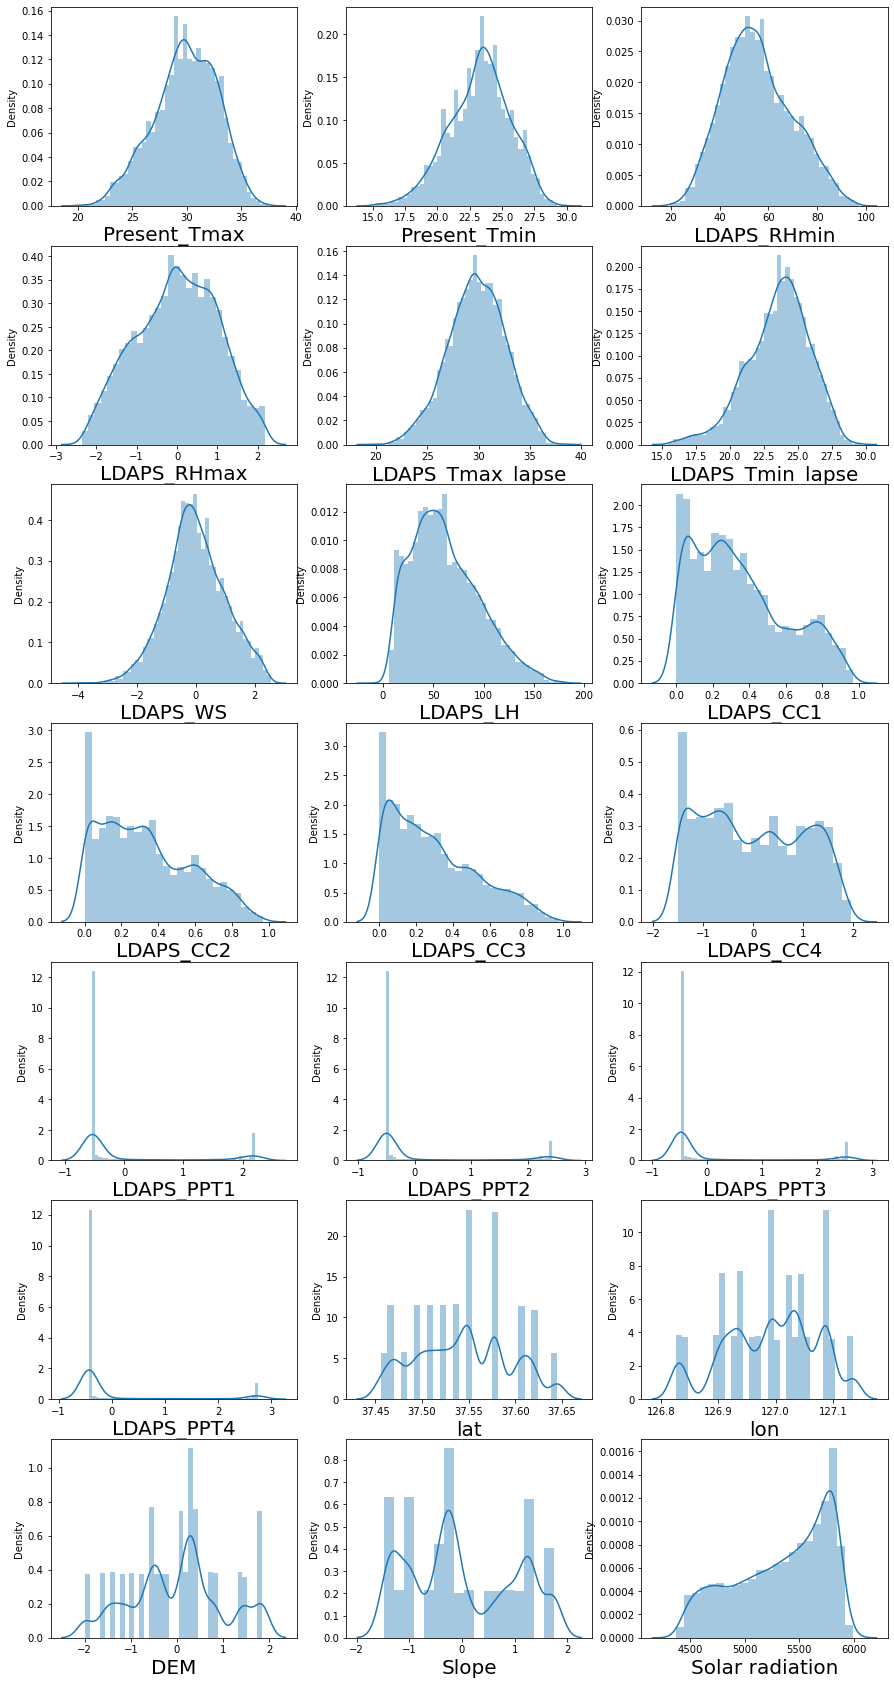

In [20]:
plt.figure(figsize=(15,30),facecolor='white')  
plotnumber=1
for column in data_features:                    # using for loop for visualization
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(data_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- All the features are loonking more normal and good than before.

- 3. Data Engineering:

 As date is a object type of data, we need to extract the date by using datetime module. And create separate columns for day, month and year. And then we can use the data.

In [22]:
data.head()

Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0  30-06-2013          28.7          21.4    58.255688     0.339989   
1  30-06-2013          31.9          21.6    52.263397     0.252994   
2  30-06-2013          31.6          23.3    48.690479    -0.717540   
3  30-06-2013          32.0          23.4    58.239788     1.371587   
4  30-06-2013          31.4          21.9    56.174095     0.178076   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  0.151473   69.451805   0.233947  ...   
1         29.850689         24.035009 -0.592946   51.937448   0.225508  ...   
2         30.091292         24.565633 -0.272980   20.573050   0.209344  ...   
3         29.704629         23.326177 -0.624906   65.727144   0.216372  ...   
4         29.113934         23.486480 -0.560385  107.965535   0.151407  ...   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0   -0.503159   -0.481591   -0.432824  37.6046  126.991  1.841921  1.325901   
1   -0.503159   -0.481591   -0.432824  37.6046  127.032  0.063671 -0.377196   
2   -0.503159   -0.481591   -0.432824  37.5776  127.058 -0.357831 -0.945648   
3   -0.503159   -0.481591   -0.432824  37.6450  127.022  0.092622  1.247336   
4   -0.503159   -0.481591   -0.432824  37.5507  127.135 -0.283504 -0.393706   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 24 columns]

In [23]:
import datetime as dt  #importing datetime library

In [24]:
# Creating separate columns
data['year'] = pd.DatetimeIndex(data['Date']).year 
data['month'] = pd.DatetimeIndex(data['Date']).month 
data['day'] = pd.DatetimeIndex(data['Date']).day

In [25]:
data.head()

Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0  30-06-2013          28.7          21.4    58.255688     0.339989   
1  30-06-2013          31.9          21.6    52.263397     0.252994   
2  30-06-2013          31.6          23.3    48.690479    -0.717540   
3  30-06-2013          32.0          23.4    58.239788     1.371587   
4  30-06-2013          31.4          21.9    56.174095     0.178076   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  0.151473   69.451805   0.233947  ...   
1         29.850689         24.035009 -0.592946   51.937448   0.225508  ...   
2         30.091292         24.565633 -0.272980   20.573050   0.209344  ...   
3         29.704629         23.326177 -0.624906   65.727144   0.216372  ...   
4         29.113934         23.486480 -0.560385  107.965535   0.151407  ...   

       lat      lon       DEM     Slope  Solar radiation  Next_Tmax  \
0  37.6046  126.991  1.841921  1.325901      5992.895996       29.1   
1  37.6046  127.032  0.063671 -0.377196      5869.312500       30.5   
2  37.5776  127.058 -0.357831 -0.945648      5863.555664       31.1   
3  37.6450  127.022  0.092622  1.247336      5856.964844       31.7   
4  37.5507  127.135 -0.283504 -0.393706      5859.552246       31.2   

   Next_Tmin  year  month  day  
0       21.2  2013      6   30  
1       22.5  2013      6   30  
2       23.9  2013      6   30  
3       24.3  2013      6   30  
4       22.5  2013      6   30  

[5 rows x 27 columns]

- Separate columns have made like day, month and year.

In [26]:
# dropping the date column as we have already extracted the data
data.drop(['Date'],axis=1,inplace=True)

#### Let's visualize which month is showing maximum temperature on which year:

<AxesSubplot:xlabel='month', ylabel='Next_Tmax'>

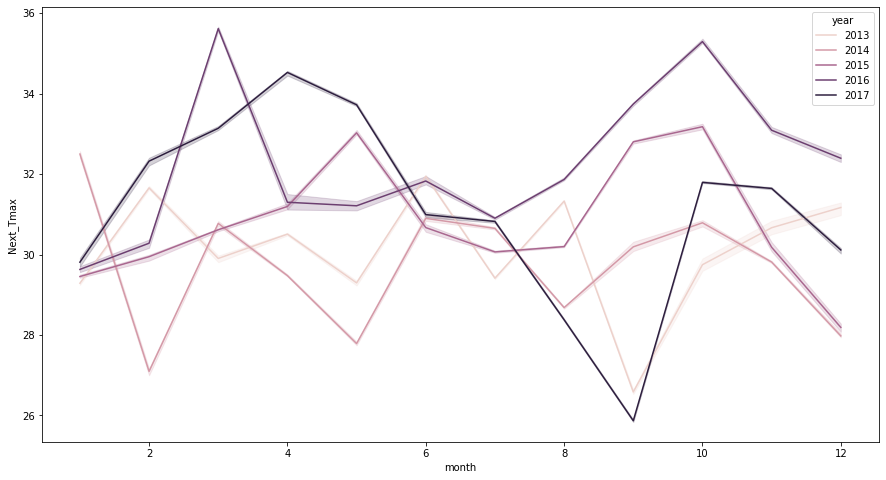

In [27]:
plt.figure(figsize=(15,8))
sns.lineplot(x='month',y='Next_Tmax',hue='year',ci=18,data=data)

- In April 2017 the temperature seems highest.
- In march 2016 the temperature seems highest.
- In october 2015 the temperature seems highest.
- In June 2014 the temperature seems highest.
- In June 2013 the temperature seems highest.

<AxesSubplot:xlabel='month', ylabel='Next_Tmin'>

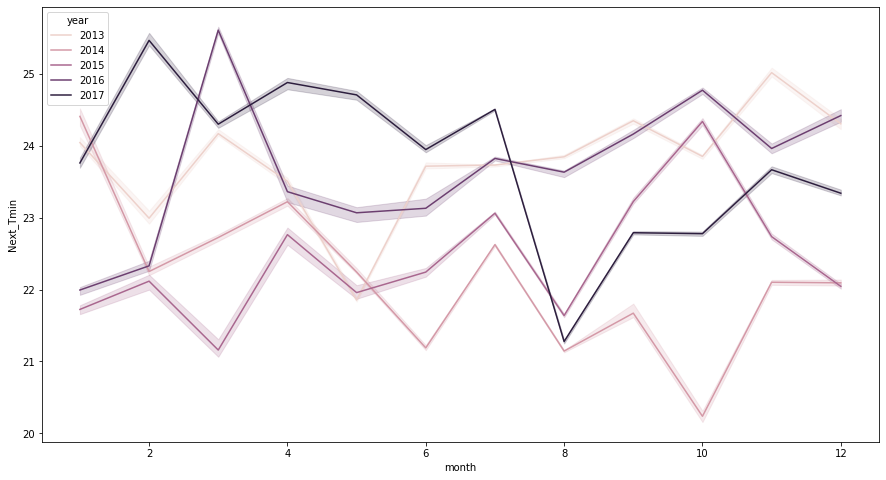

In [28]:
plt.figure(figsize=(15,8))
sns.lineplot(x='month',y='Next_Tmin',hue='year',ci=18,data=data)

- In August 2017 the temperature seems lowest.
- In February 2016 the temperature seems lowest.
- In march 2015 the temperature seems lowest.
- In October 2014 the temperature seems lowest.
- In may 2013 the temperature seems lowest.

In [29]:
#conversion of years
data['year'].replace(2013,1,inplace=True)
data['year'].replace(2014,2,inplace=True)
data['year'].replace(2015,3,inplace=True)
data['year'].replace(2016,4,inplace=True)
data['year'].replace(2017,5,inplace=True)

In [30]:
# for making the day, month, year columns more useful, we are combining them
data['Time']=(data['year']*365)+(data['month']*30)+(data['day'])  

In [31]:
# dropping those year, month and day column as we have the combines column 'time'
data.drop(['year','month','day'],axis=1,inplace=True)
data.head()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0          28.7          21.4    58.255688     0.339989         28.074101   
1          31.9          21.6    52.263397     0.252994         29.850689   
2          31.6          23.3    48.690479    -0.717540         30.091292   
3          32.0          23.4    58.239788     1.371587         29.704629   
4          31.4          21.9    56.174095     0.178076         29.113934   

   LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0         23.006936  0.151473   69.451805   0.233947   0.203896  ...   
1         24.035009 -0.592946   51.937448   0.225508   0.251771  ...   
2         24.565633 -0.272980   20.573050   0.209344   0.257469  ...   
3         23.326177 -0.624906   65.727144   0.216372   0.226002  ...   
4         23.486480 -0.560385  107.965535   0.151407   0.249995  ...   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0   -0.481591   -0.432824  37.6046  126.991  1.841921  1.325901   
1   -0.481591   -0.432824  37.6046  127.032  0.063671 -0.377196   
2   -0.481591   -0.432824  37.5776  127.058 -0.357831 -0.945648   
3   -0.481591   -0.432824  37.6450  127.022  0.092622  1.247336   
4   -0.481591   -0.432824  37.5507  127.135 -0.283504 -0.393706   

   Solar radiation  Next_Tmax  Next_Tmin  Time  
0      5992.895996       29.1       21.2   575  
1      5869.312500       30.5       22.5   575  
2      5863.555664       31.1       23.9   575  
3      5856.964844       31.7       24.3   575  
4      5859.552246       31.2       22.5   575  

[5 rows x 24 columns]

- Now the dataset is looking better than before .


#### As there are two label variables so the data has to be split into two parts. We will split features as x and y for predicting Next_Tmax, And will split features as X and Y for predicting Next_Tmin.

In [33]:
#For First label Next_Tmax
y=data['Next_Tmax']
x=data.drop(columns=['Next_Tmax'])

#### 1. Standardization:

As the feature values are in different scales, let's standardize those.

In [34]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

- We are checking the VIF to understand, if there is multicolinearity present or not.

In [35]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

vif          Features
0   2.833968      Present_Tmax
1   3.434822      Present_Tmin
2   6.218309       LDAPS_RHmin
3   2.532353       LDAPS_RHmax
4   6.980015  LDAPS_Tmax_lapse
5   8.793740  LDAPS_Tmin_lapse
6   1.200821          LDAPS_WS
7   1.522668          LDAPS_LH
8   4.835696         LDAPS_CC1
9   5.599837         LDAPS_CC2
10  5.077050         LDAPS_CC3
11  2.681307         LDAPS_CC4
12  2.666565        LDAPS_PPT1
13  2.195619        LDAPS_PPT2
14  1.809962        LDAPS_PPT3
15  1.671754        LDAPS_PPT4
16  1.223393               lat
17  1.225144               lon
18  2.954233               DEM
19  2.725713             Slope
20  1.247404   Solar radiation
21  5.562914         Next_Tmin
22  1.136452              Time

- We can see most of the features are looking great. And there is not much correlation between features.

#### 1. Hold Out Method: ( prediction of Next_Tmax ) :

Model will be built on Hold Out method (75/25 training and test split) to gauge how well the Regressor is working.

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

### Model Creation:

Now we are going to build 6 different models. And let's check which one is giving us the best Accuray. Those models are:

1. LinearRegression
2. KNeiborsRegressor
3. RandomForestRegressor
4. Gradient Boosting Regressor
5. Decision Tree Regresor
6. Ada-Boost Regressor
7. XGBRegressor


##### 1. Linear Rgression:

In [118]:
#Model Training:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [119]:
#Model Prediction with trained data:
y_lr_pred = lr.predict(x_train)

In [120]:
print("R Square Score of lr:",metrics.r2_score(y_train,y_lr_pred))

R Square Score of lr: 0.7819832713267406


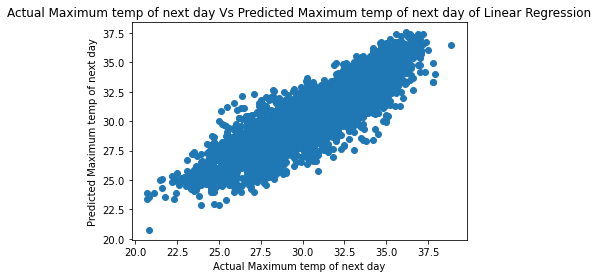

In [121]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_lr_pred)
plt.xlabel('Actual Maximum temp of next day')
plt.ylabel('Predicted Maximum temp of next day')
plt.title('Actual Maximum temp of next day Vs Predicted Maximum temp of next day of Linear Regression')
plt.show()

In [122]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

##### Evaluation of LR:

In [123]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)
print('Accuracy of LR :',lr_accuracy*100)

R Square Score of Linear Regression: 0.7660684436689984
Accuracy of LR : 76.60684436689984


In [43]:
print ('mean absolute error of linear regression is: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of linear regression is:  1.1082196967681546


In [44]:
print ('mean squared error of linear regression is: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of linear regression is:  2.088637831776274


In [45]:
print ('Root mean squared error of linear regression is: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of linear regression is:  1.4452120369607617


##### Scores of Linear Regression:

1. Accuracy of LR - 0.7660684436689984
2. MAE of LR -  1.1082196967681546
3. MSE of LR -  2.088637831776274
4. RMSE of LR - 1.4452120369607617

#### 2. KNeighbors Regressor:

In [46]:
#Model Training:

kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [47]:
#Model Prediction with trained data:
y_kn_pred = kn.predict(x_train)

In [49]:
print("R Square Score of kn:",metrics.r2_score(y_train,y_kn_pred))

R Square Score of kn: 0.8476092354929241


<function matplotlib.pyplot.show(close=None, block=None)>

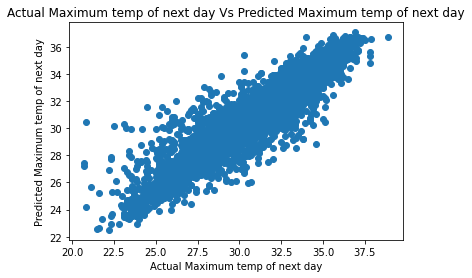

In [50]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_kn_pred)
plt.xlabel('Actual Maximum temp of next day')
plt.ylabel('Predicted Maximum temp of next day')
plt.title('Actual Maximum temp of next day Vs Predicted Maximum temp of next day')
plt.show

In [51]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

#### Evaluation of K-Neighbors Regressor:

In [52]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)
print('Accuracy of KNN :',kn_accuracy*100)

R Square Score of K-Neighbors Regressor: 0.7558618033095934
Accuracy of KNN : 75.58618033095934


In [53]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  1.0171607093618935


In [54]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  2.179766944600299


In [55]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  1.4764033813969335


#### Scores of K-Neighbors Regressor:

1.    Accuracy - 0.7558618033095934
2.    MAE of KNN - 1.0171607093618935
3.    MSE of KNN - 2.179766944600299
4.    RMSE of KNN - 1.4764033813969335

#### 3. Random Forest Regressor:

In [56]:
#Model Training:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
#Model Prediction with trained data:
y_rf_pred = rf.predict(x_train)

In [58]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rf_pred))

R Square Score of Random Forest Regressor: 0.9864847747216958


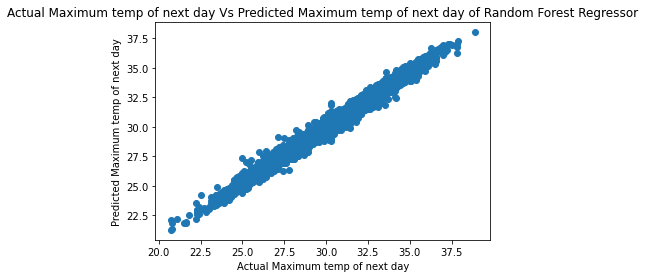

In [59]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rf_pred)
plt.xlabel('Actual Maximum temp of next day')
plt.ylabel('Predicted Maximum temp of next day')
plt.title('Actual Maximum temp of next day Vs Predicted Maximum temp of next day of Random Forest Regressor')
plt.show()

In [60]:
# Predicting test data with model:
y_test_rf_pred = rf.predict(x_test)

#### Evaluation of Random Forest Regressor:

In [61]:
rf_accuracy = metrics.r2_score(y_test,y_test_rf_pred)
print("R Square Score of Random Forest Regressor:",rf_accuracy)
print('Accuracy of RFR :',rf_accuracy*100)

R Square Score of Random Forest Regressor: 0.9023560622975415
Accuracy of RFR : 90.23560622975415


In [62]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rf_pred))

mean absolute error of Random Forest Regressor:  0.6880023190677287


In [63]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rf_pred))

mean squared error of Random Forest Regressor is:  0.8718055209293417


In [64]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rf_pred)))

Root mean squared error of Random Forest Regressor is:  0.9337052644862519


#### Scores of Random Forest Regressor:

1.    Accuracy of RFR : 0.9023560622975415
2.    MAE of RFR :  0.6880023190677287
3.    MSE of RFR : 0.8718055209293417
4.    RMSE of RFR : 0.9337052644862519

#### 4. Gradient Boosting Regressor:

In [124]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [125]:
#Model Prediction with trained data:
y_gbr_pred = gbr.predict(x_train)

In [126]:
print("R Square Score of Gradient Boosting Regressor: ",metrics.r2_score(y_train,y_gbr_pred))

R Square Score of Gradient Boosting Regressor:  0.8860604199506473


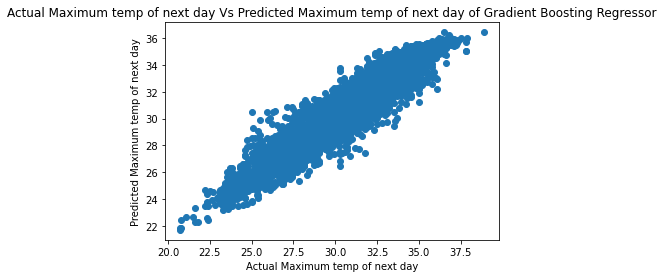

In [127]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_gbr_pred)
plt.xlabel('Actual Maximum temp of next day')
plt.ylabel('Predicted Maximum temp of next day')
plt.title('Actual Maximum temp of next day Vs Predicted Maximum temp of next day of Gradient Boosting Regressor')
plt.show()

In [128]:
# Predicting test data with model:
y_test_gbr_pred = gbr.predict(x_test)

#### Evaluation of Gradient Boosting Regressor:

In [129]:
gbr_accuracy = metrics.r2_score(y_test,y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)

R Square Score of Gradient Boosting Regressor: 0.8566665667683215
Accuracy of GBR : 85.66665667683215


In [130]:
print ('mean absolute error of Gradient Boosting Regressor: ',mean_absolute_error(y_test,y_test_gbr_pred))

mean absolute error of Gradient Boosting Regressor:  0.862541613968383


In [131]:
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_error(y_test,y_test_gbr_pred))

mean squared error of Gradient Boosting Regressor is:  1.2797402620724936


In [132]:
print ('Root mean squared error of Gradient Boosting Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_gbr_pred)))

Root mean squared error of Gradient Boosting Regressor:  1.1312560550434607


##### Scores of Gradient Boosting Regressor:

1.    Accuracy of GBR : 0.8564748837163055
2.    MAE of GBR : 0.862905120487228
3.    MSE of GBR : 1.2814516877579805
4.    RMSE of GBR : 1.1320122295090191
   
#### 5. XGBRegressor:  

In [88]:
xgb=xgb.XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
#Model Prediction with trained data:
y_xgb_pred = xgb.predict(x_train)

In [90]:
print("R Square Score of xgb:",metrics.r2_score(y_train,y_xgb_pred))

R Square Score of xgb: 0.9912564533052792


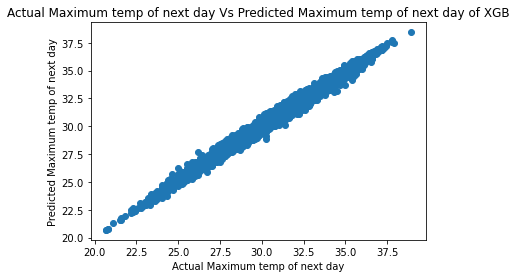

In [91]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_xgb_pred)
plt.xlabel('Actual Maximum temp of next day')
plt.ylabel('Predicted Maximum temp of next day')
plt.title('Actual Maximum temp of next day Vs Predicted Maximum temp of next day of XGB')
plt.show()

In [92]:
# Predicting test data with model:
y_test_xgb_pred = xgb.predict(x_test)

#### Evaluation of XGBRegressor:

In [93]:
xgb_accuracy =metrics.r2_score(y_test,y_test_xgb_pred)
print("R Square Score of xgb:",xgb_accuracy)
print('Accuracy of XGB :',xgb_accuracy*100)

R Square Score of xgb: 0.9233673404590889
Accuracy of XGB : 92.33673404590888


In [94]:
print ('mean absolute error of XGB: ',mean_absolute_error(y_test,y_test_xgb_pred))

mean absolute error of XGB:  0.6163222570303193


In [95]:
print ('mean squared error of  XGB is: ',mean_squared_error(y_test,y_test_xgb_pred))

mean squared error of  XGB is:  0.6842081264158479


In [96]:
print ('Root mean squared error of XGB is: ',np.sqrt(mean_squared_error(y_test,y_test_xgb_pred)))

Root mean squared error of XGB is:  0.8271687411984618


#### Scores of XGB:

1.    Accuracy of XGB : 0.9233673404590889
2.    MAE of XGB : 0.6163222570303193
3.    MSE of XGB : 0.6842081264158479
4.    RMSE of XGB : 0.8271687411984618




- As we can see XGBRegressor has given the best accuracy 92%. Now let's do regularization as well.


#### Regulalization:

When we use regression models to train some data,there is a good chance the model will overfit the given training dataset. Regularization helps to sort this overfitting problem by restricting the degrees of freedom of a given equation. Regularization constraints the weights of features to avoid overfitting

#### Regularization using Lasso:

In [98]:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [99]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

3.335483001595702e-05

In [100]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.335483001595702e-05)

In [101]:
lasso_reg.score(x_test,y_test)

0.7660750376711281

#### Regularization Using Ridge:

In [103]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [104]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [105]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [106]:
ridge_model.score(x_test,y_test)

0.7660684669833052

- Both Lasso and Ridge is showing 76% accuracy like linear regression.

#### Evaluating with Cross Validation:

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

In [112]:
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean()*100)

[0.77322085 0.77782122 0.77279136 0.79058461 0.77955106]
mean : 77.87938208127102


In [108]:
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean()*100)

[0.72907678 0.7478189  0.74656765 0.76372529 0.73865044]
mean : 74.51678137055904


In [109]:
rf_cv_score = cross_val_score(rf,x_train,y_train,cv=5,scoring='r2')
print(rf_cv_score)
print('mean :',rf_cv_score.mean()*100)

[0.89260754 0.88990902 0.89735179 0.89788361 0.89784114]
mean : 89.51186204812436


In [133]:
gbr_cv_score = cross_val_score(gbr,x_train,y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('mean :',gbr_cv_score.mean()*100)

[0.85959217 0.85772555 0.85826738 0.86320046 0.85524811]
mean : 85.88067352446822


In [114]:
xgb_cv_score = cross_val_score(xgb,x_train,y_train,cv=5,scoring='r2')
print(xgb_cv_score)
print('mean :',xgb_cv_score.mean()*100)

[0.91845375 0.91990502 0.91748532 0.92101081 0.91753867]
mean : 91.88787129424244


#### Selection of the best model for Temperature Prediction (Next_Tmax) :
 Now let's check the difference between Accuracy Scores and Cross Validation Scores of the models to select the best model out of 5 models.

- LR = 76.60-77.87 = -1.25, 
- KNN = 75.58-74.51 = 1.07, 
- RFR = 90.23-89.51 = 0.72, 
- GBR = 85.66-85.88= -0.22,
- XGB = 92.33-91.88 = 0.45,


#### Observation:

 Overall the result of all models are good. As most of the Accuracy of the Models are between 75-92%.
As the difference between CV score and accuracy score of XGB is least and as it's having the best accuracy, we are going to tune it's parameters to obtain best result.

#### Hyperparameter Tuning:

Now we will use Grid Search Technique to tune the hyperparameter of XGBRegressor. After getting the best parameters we can put those into the model to obtain the best accuracy.


In [140]:
xgbr = xgb.XGBRegressor()
grid_param= {'learning_rate': [0.01,0.1],'max_depth': [3, 5, 7, 10],'colsample_bytree': [0.5, 0.7],
             'n_estimators' : [100, 200, 500],'objective':['reg:squarederror']}

In [141]:
gbr_search=GridSearchCV(xgbr,param_grid=grid_param,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
gbr_search.fit(x_train,y_train)
gbr_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [142]:
xgbr= xgb.XGBRegressor(learning_rate=0.1,max_depth=7,colsample_bytree=0.7,n_estimators=500) 
xgbr.fit(x_train,y_train)
y_pred=xgbr.predict(x_test)

In [143]:
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(y_test,y_pred)*100)

*** Accuracy Post Tuning***
93.88973044458254


#### Observation:

After hyperparameter tuning with best parameters of XGBoostRegressor is giving the best accuracy of 93.88%. So, we are going to save XGBoostRegressor Model for Next day's maximum temperature prediction.

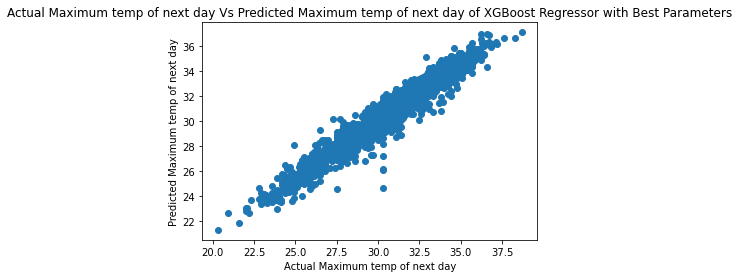

In [144]:
# Checking Actual sales Vs Predicted Maximum temp of next day using Graph after Hyperparameter tuning:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Maximum temp of next day')
plt.ylabel('Predicted Maximum temp of next day')
plt.title('Actual Maximum temp of next day Vs Predicted Maximum temp of next day of XGBoost Regressor with Best Parameters')
plt.show()

- As the XGBoostingRegressor is giving best accuracy after Hyperparameter tuning, we are going to save this model.

In [145]:
# model prediction using XGBRegressor
x_predict = list(xgbr.predict(x_test))
xgbr_next_max = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(xgbr_next_max))

      predicted_values  orignal_values
1131         32.382957            32.3
5868         34.596203            34.3
104          30.539886            32.6
1811         32.403999            32.6
1835         29.880203            29.6
...                ...             ...
2938         28.283300            28.6
447          28.480301            30.0
5307         29.313496            29.2
448          28.717344            29.2
7286         27.518320            26.6

[1784 rows x 2 columns]


In [146]:
#importing joblib
import joblib

joblib.dump(xgbr,'xgbr_temp_max.obj')

# SAVING THE MODEL

['xgbr_temp_max.obj']

In [147]:
xgbr_from_joblib=joblib.load('xgbr_temp_max.obj')
xgbr_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([32.382957, 34.596203, 30.539886, ..., 29.313496, 28.717344,
       27.51832 ], dtype=float32)

- #### Now we will split features as X and Y for predicting Next_Tmin. Then we will create another 5 models for prediction of Next_Tmin.

In [148]:
data.head()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0          28.7          21.4    58.255688     0.339989         28.074101   
1          31.9          21.6    52.263397     0.252994         29.850689   
2          31.6          23.3    48.690479    -0.717540         30.091292   
3          32.0          23.4    58.239788     1.371587         29.704629   
4          31.4          21.9    56.174095     0.178076         29.113934   

   LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0         23.006936  0.151473   69.451805   0.233947   0.203896  ...   
1         24.035009 -0.592946   51.937448   0.225508   0.251771  ...   
2         24.565633 -0.272980   20.573050   0.209344   0.257469  ...   
3         23.326177 -0.624906   65.727144   0.216372   0.226002  ...   
4         23.486480 -0.560385  107.965535   0.151407   0.249995  ...   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0   -0.481591   -0.432824  37.6046  126.991  1.841921  1.325901   
1   -0.481591   -0.432824  37.6046  127.032  0.063671 -0.377196   
2   -0.481591   -0.432824  37.5776  127.058 -0.357831 -0.945648   
3   -0.481591   -0.432824  37.6450  127.022  0.092622  1.247336   
4   -0.481591   -0.432824  37.5507  127.135 -0.283504 -0.393706   

   Solar radiation  Next_Tmax  Next_Tmin  Time  
0      5992.895996       29.1       21.2   575  
1      5869.312500       30.5       22.5   575  
2      5863.555664       31.1       23.9   575  
3      5856.964844       31.7       24.3   575  
4      5859.552246       31.2       22.5   575  

[5 rows x 24 columns]

In [150]:
Y=data['Next_Tmin']
X=data.drop(columns=['Next_Tmin'])
Y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7134, dtype: float64

- After seperation the data we will standardize the features.

#### 2. Standardization:

In [151]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 2. Hold Out Method (for Next_Tmin ):

Model will be built on Hold Out method (75/25 training and test split) to gauge how well the Regressor is working.

In [153]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

 ### 2. Model Creation:

Now we are going to build 5 different models. And let's check which one is giving us the best Accuray. Those models are:

1. LinearRegression
2. KNeiborsRegressor
3. RandomForestRegressor
4. Gradient Boosting Regressor
5. XGBRegressor


##### 1. Linear Rgression:

In [154]:
#Model Training:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [155]:
#Model Prediction with trained data:
Y_lr_pred = lr.predict(X_train)

In [156]:
print("R Square Score of lr:",metrics.r2_score(Y_train,Y_lr_pred))

R Square Score of lr: 0.8427595424637098


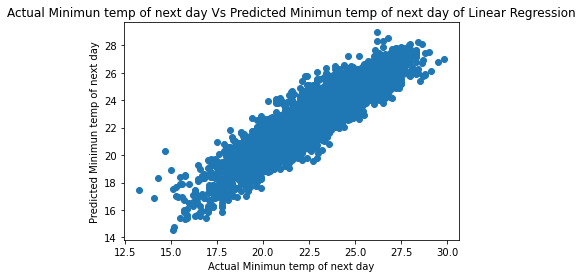

In [157]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_lr_pred)
plt.xlabel('Actual Minimun temp of next day')
plt.ylabel('Predicted Minimun temp of next day')
plt.title('Actual Minimun temp of next day Vs Predicted Minimun temp of next day of Linear Regression')
plt.show()

In [159]:
# Predicting test data with model:
Y_test_lr_pred = lr.predict(X_test)

#### Evaluation of LR:

In [160]:
lr_accuracy = metrics.r2_score(Y_test,Y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)
print('Accuracy of LR :',lr_accuracy*100)

R Square Score of Linear Regression: 0.8352945560410863
Accuracy of LR : 83.52945560410862


In [161]:
print ('mean absolute error of linear regression is: ',mean_absolute_error(Y_test,Y_test_lr_pred))

mean absolute error of linear regression is:  0.7595701436479201


In [162]:
print ('mean squared error of linear regression is: ',mean_squared_error(Y_test,Y_test_lr_pred))

mean squared error of linear regression is:  0.9429025068825235


In [163]:
print ('Root mean squared error of linear regression is: ',np.sqrt(mean_squared_error(Y_test,Y_test_lr_pred)))

Root mean squared error of linear regression is:  0.971031671410631


##### Scores of Linear Regression:

1. Accuracy of LR - 0.8352945560410863
2. MAE of LR -  0.7595701436479201
3. MSE of LR -  0.9429025068825235
4. RMSE of LR - 0.971031671410631

#### 2. KNeighbors Regressor:

In [164]:
#Model Training:

kn = KNeighborsRegressor()
kn.fit(X_train,Y_train)

KNeighborsRegressor()

In [165]:
#Model Prediction with trained data:
Y_knn_pred = kn.predict(X_train)

In [166]:
print("R Square Score of kn:",metrics.r2_score(Y_train,Y_knn_pred))

R Square Score of kn: 0.9236231536156031


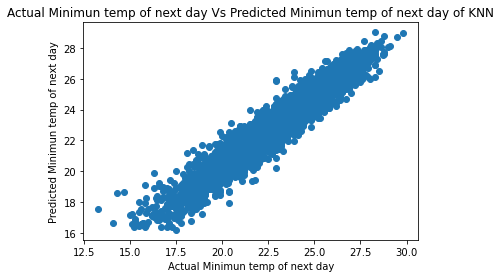

In [167]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_knn_pred)
plt.xlabel('Actual Minimun temp of next day')
plt.ylabel('Predicted Minimun temp of next day')
plt.title('Actual Minimun temp of next day Vs Predicted Minimun temp of next day of KNN')
plt.show()

In [168]:
# Predicting test data with model:
Y_test_kn_pred = kn.predict(X_test)

#### Evaluation of K-Neighbors Regressor:

In [170]:
kn_accuracy =metrics.r2_score(Y_test,Y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)

R Square Score of K-Neighbors Regressor: 0.883083112962173


In [171]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(Y_test,Y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  0.6153720696010564


In [172]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(Y_test,Y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  0.6693235101103757


In [173]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(Y_test,Y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  0.8181219408562367


#### Scores of K-Neighbors Regressor:

1.    Accuracy of KNN- 0.883083112962173
2.    MAE of KNN - 0.6153720696010564
3.    MSE of KNN - 0.6693235101103757
4.    RMSE of KNN - 0.8181219408562367


#### 3. Random Forest Regressor:

In [228]:
#Model Training:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [229]:
#Model Prediction with trained data:
Y_rf_pred = rf.predict(X_train)

In [230]:
print("R Square Score of Random Forest Regressor:" ,metrics.r2_score(Y_train,Y_rf_pred))

R Square Score of Random Forest Regressor: 0.9869390379063726


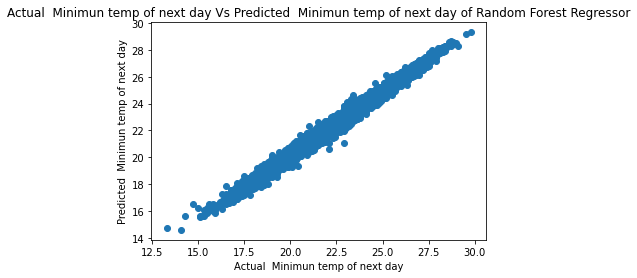

In [231]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_rf_pred)
plt.xlabel('Actual  Minimun temp of next day')
plt.ylabel('Predicted  Minimun temp of next day')
plt.title('Actual  Minimun temp of next day Vs Predicted  Minimun temp of next day of Random Forest Regressor')
plt.show()

In [232]:
# Predicting test data with model:
Y_test_rf_pred = rf.predict(X_test)

#### Evaluation of Random Forest Regressor:

In [233]:
rf_accuracy =metrics.r2_score(Y_test,Y_test_rf_pred)
print("R Square Score of Random Forest Regressor:",rf_accuracy)

R Square Score of Random Forest Regressor: 0.9031254203100196


In [182]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(Y_test,Y_test_rf_pred))

mean absolute error of Random Forest Regressor:  0.5596701315541236


In [183]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(Y_test,Y_test_rf_pred))

mean squared error of Random Forest Regressor is:  0.5626196932415777


In [184]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(Y_test,Y_test_rf_pred)))

Root mean squared error of Random Forest Regressor is:  0.750079791249956


#### Scores of Random Forest Regressor:

1.    Accuracy of RFR : 0.9031254203100196
2.    MAE of RFR :  0.5596701315541236
3.    MSE of RFR : 0.5626196932415777
4.    RMSE of RFR : 0.750079791249956

    
#### 4. Gradient Boosting Regressor: 

In [185]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [186]:
#Model Prediction with trained data:
Y_gbr_pred = gbr.predict(X_train)

In [187]:
print("R Square Score of Gradient Boosting Regressor: ",metrics.r2_score(Y_train,Y_gbr_pred))

R Square Score of Gradient Boosting Regressor:  0.9128554790904269


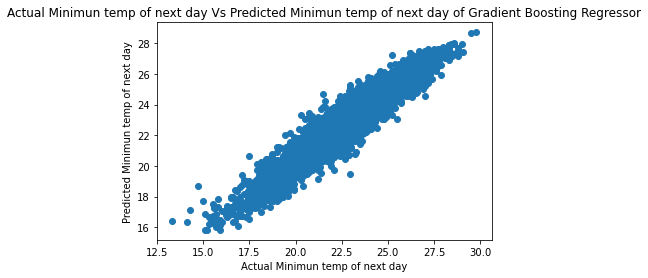

In [188]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_gbr_pred)
plt.xlabel('Actual Minimun temp of next day')
plt.ylabel('Predicted Minimun temp of next day')
plt.title('Actual Minimun temp of next day Vs Predicted Minimun temp of next day of Gradient Boosting Regressor')
plt.show()

In [189]:
# Predicting test data with model:
Y_test_gbr_pred = gbr.predict(X_test)

#### Evaluation of Gradient Boosting Regressor:

In [226]:
gbr_accuracy = metrics.r2_score(Y_test,Y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)

R Square Score of Gradient Boosting Regressor: 0.8899452148543628
Accuracy of GBR : 88.99452148543628


In [191]:
print ('mean absolute error of Gradient Boosting Regressor: ',mean_absolute_error(Y_test,Y_test_gbr_pred))

mean absolute error of Gradient Boosting Regressor:  0.6135125851409379


In [192]:
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_error(Y_test,Y_test_gbr_pred))

mean squared error of Gradient Boosting Regressor is:  0.6300394832979826


In [193]:
print ('Root mean squared error of Gradient Boosting Regressor: ',np.sqrt(mean_squared_error(Y_test,Y_test_gbr_pred)))

Root mean squared error of Gradient Boosting Regressor:  0.7937502650695512


#### Scores of Gradient Boosting Regressor:

1.    Accuracy of GBR : 0.8899452148543628
2.    MAE of GBR :  0.6135125851409379
3.    MSE of GBR : 0.6300394832979826
4.    RMSE of GBR : 0.7937502650695512


    
#### 5. XGBRegressor:    

In [194]:
xgb=xgb.XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [195]:
#Model Prediction with trained data:
Y_xgb_pred = xgb.predict(X_train)

In [196]:
print("R Square Score of xgb:",metrics.r2_score(Y_train,Y_xgb_pred))

R Square Score of xgb: 0.9929550736410172


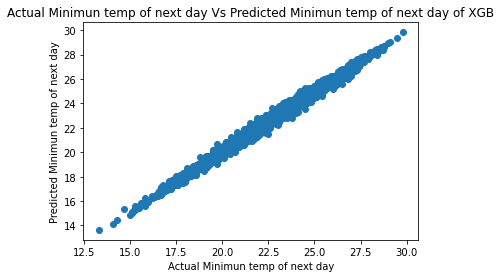

In [197]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_xgb_pred)
plt.xlabel('Actual Minimun temp of next day')
plt.ylabel('Predicted Minimun temp of next day')
plt.title('Actual Minimun temp of next day Vs Predicted Minimun temp of next day of XGB')
plt.show()

In [198]:
# Predicting test data with model:
Y_test_xgb_pred = xgb.predict(X_test)

#### Evaluation of XGBRegressor:

In [199]:
xgb_accuracy =metrics.r2_score(Y_test,Y_test_xgb_pred)
print("R Square Score of xgb:",xgb_accuracy)

R Square Score of xgb: 0.9326111638012836


In [200]:
print ('mean absolute error of XGB: ',mean_absolute_error(Y_test,Y_test_xgb_pred))

mean absolute error of XGB:  0.45483750547881024


In [201]:
print ('mean squared error of  XGB is: ',mean_squared_error(Y_test,Y_test_xgb_pred))

mean squared error of  XGB is:  0.3857862925497224


In [202]:
print ('Root mean squared error of XGB is: ',np.sqrt(mean_squared_error(Y_test,Y_test_xgb_pred)))

Root mean squared error of XGB is:  0.6211169717128348


#### Scores of XGB:

1.    Accuracy of XGB : 0.9326111638012836
2.    MAE of XGB : 0.45483750547881024
3.    MSE of XGB : 0.3857862925497224
4.    RMSE of XGB : 0.6211169717128348

- XGBRegressor has given the best accuracy of 93%. Let's now do the Regularization.

#### Regulalization:

When we use regression models to train some data,there is a good chance the model will overfit the given training dataset. Regularization helps to sort this overfitting problem by restricting the degrees of freedom of a given equation. Regularization constraints the weights of features to avoid overfitting

#### Regularization using Lasso:

In [212]:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(X_train,Y_train)

LassoCV(normalize=True)

In [213]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

2.933100735213316e-05

In [214]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=2.933100735213316e-05)

In [215]:
lasso_reg.score(X_test,Y_test)

0.8352972508813271

#### Regularization Using Ridge:

In [216]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(X_train,Y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [217]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [218]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(X_train,Y_train)

Ridge(alpha=0.001)

In [219]:
ridge_model.score(X_test,Y_test)

0.8352945620410189

- Lasso and Ridge is giving same accuracy of 83% like linear regression.

 #### Evaluating with Cross Validation:

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

In [220]:
lr_cv_score = cross_val_score(lr,X_train,Y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean()*100)

[0.84869711 0.84698936 0.83619585 0.83113645 0.83898843]
mean : 84.04014400077688


In [221]:
kn_cv_score = cross_val_score(kn,X_train,Y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean()*100)

[0.87886124 0.86931072 0.85899937 0.87684838 0.88311814]
mean : 87.3427569990547


In [227]:
rf_cv_score = cross_val_score(rf,X_train,Y_train,cv=5,scoring='r2')
print(rf_cv_score)
print('mean :',rf_cv_score.mean()*100)

[0.91129865 0.90058619 0.89455726 0.90291763 0.90153224]
mean : 90.21783926755977


In [224]:
gbr_cv_score = cross_val_score(gbr,X_train,Y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('mean :',gbr_cv_score.mean()*100)

[0.90469375 0.8930264  0.88549487 0.88774205 0.89173241]
mean : 89.25378980895056


In [225]:
xgb_cv_score = cross_val_score(xgb,X_train,Y_train,cv=5,scoring='r2')
print(xgb_cv_score)
print('mean :',xgb_cv_score.mean()*100)

[0.93650178 0.93591712 0.92827696 0.9286533  0.9313391 ]
mean : 93.21376498143098


#### Selection of the best model for Temperature Prediction (Next_Tmin) :
 Now let's check the difference between Accuracy Scores and Cross Validation Scores of the models to select the best model out of 5 models.

- LR = 83.52-84.04 = -0.52, 
- KNN = 88.30-87.34 = 0.96, 
- RFR = 90.31-90.24 = 0.07, 
- GBR = 88.99-89.25= -0.26,
- XGB = 93.26-93.21 = 0.05,


#### Observation:

 Overall the result of all models are good. As most of the Accuracy of the Models are between 83-93%.
As the difference between CV score and accuracy score of XGB is least and as it's having the best accuracy 93%, we are going to tune it's parameters to obtain best result.

#### Hyperparameter Tuning:

Now we will use Grid Search Technique to tune the hyperparameter of XGBRegressor. After getting the best parameters we can put those into the model to obtain the best accuracy.


In [236]:
xgbr = xgb.XGBRegressor()
grid_param= {'learning_rate': [0.01,0.1],'max_depth': [3, 5, 7, 10],'colsample_bytree': [0.5, 0.7],
             'n_estimators' : [100, 200, 500],'objective':['reg:squarederror']}

In [237]:
gbr_search=GridSearchCV(xgbr,param_grid=grid_param,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
gbr_search.fit(X_train,Y_train)
gbr_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [238]:
xgbr= xgb.XGBRegressor(learning_rate=0.1,max_depth=7,colsample_bytree=0.7,n_estimators=500) 
xgbr.fit(X_train,Y_train)
Y_pred=xgbr.predict(X_test)

In [239]:
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(Y_test,Y_pred)*100)

*** Accuracy Post Tuning***
94.40390964578027


#### Observation:

After hyperparameter tuning with best parameters of XGBoostRegressor is giving the best accuracy of 94.40%. So, we are going to save XGBoostRegressor Model for Temperature prediction ( Minimun temp of next day ).


Let's check the graph after hyperparameter tuning as well.

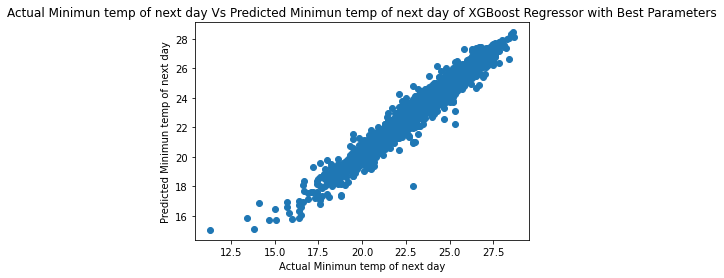

In [240]:
# Checking Actual capacity_mw Vs Predicted capacity_mw using Graph after Hyperparameter tuning:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual Minimun temp of next day')
plt.ylabel('Predicted Minimun temp of next day')
plt.title('Actual Minimun temp of next day Vs Predicted Minimun temp of next day of XGBoost Regressor with Best Parameters')
plt.show()

- As XGBRegressor has given the best accuracy of 94% after hyperparameter tuning, we are going to save it.

In [241]:
# model prediction using XGBRegressor
X_predict = list(xgbr.predict(X_test))
xgbr_next_min = {'predicted_values':X_predict,'orignal_values':Y_test}
print(pd.DataFrame(xgbr_next_min))

      predicted_values  orignal_values
1131         25.915125            26.0
5868         25.237415            25.7
104          23.062748            22.4
1811         21.674273            21.1
1835         22.826305            23.3
...                ...             ...
2938         23.446423            24.1
447          24.215370            24.0
5307         26.519777            26.5
448          24.425426            24.0
7286         22.831526            22.4

[1784 rows x 2 columns]


In [242]:
#importing joblib
import joblib

joblib.dump(xgbr,'xgbr_temp_max.obj')

# SAVING THE MODEL

['xgbr_temp_max.obj']

In [243]:
xgbr_from_joblib=joblib.load('xgbr_temp_max.obj')
xgbr_from_joblib.predict(X_test)

#TESTING THE SAVED MODEL

array([25.915125, 25.237415, 23.062748, ..., 26.519777, 24.425426,
       22.831526], dtype=float32)

#### Conclusion:

Weather forecasting or meterology is a essential thing for day to day life actions. It helps people to know what will be the next day's atmospheric condition. And to predict the next day's Temperature we need to understand and analyze several aspects of nature like Humidity, Precipitation, Cloud cover, Wind speed, latitude and longitude of that area, solar radiation and most importantly the previous years data of the same area.
We have analyze those aspects and we have come to the conclusion that,

1. Next day maximum temperature has highest positive correlation with LDAPS_Tmax_lapse( next-day maximum air temperature applied lapse rate), Nextday's maximum temperature has highest negative correlation with LDPAS_CC3(next-day 3rd 6-hour split average cloud cover (12-17 h)).

2. Next day's minimum temperature has highest positive correlation with LDAPS_Tmin_lapse(next-day maximum air temperature applied lapse rate)), Next day's minimum temperature has highest negative correlation with DEM (Elevation).
It means lapse rate, cloud cover and Elevation have very strong effect on temperature of the area.

- After analyzing those points we have made 5 models and predicted both minimum temperature of next day and maximum temperature of next day. out of those 5 models XGBRegressor has given the best accuracy for both the labels (minimum temperature(93%) and maximum temperature(93%)).



 